<a href="https://colab.research.google.com/github/Marisa280/Application_Predict_Pakistani_House_Price/blob/main/Project_Pakistani_real_estate02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Preparation**

## 1. Paring

In [ ]:
path = ('/content/drive/MyDrive/zameen-updated-ori.csv')
zameen_data = pd.read_csv(path)
zameen_data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,Area Type,Area Size,Area Category
0,13935017,476,https://www.zameen.com/Property/karachi_malir_...,House,4400000,Malir,Karachi,Sindh,24.893209,67.195473,2,0 Marla,For Sale,2,Marla,0.0,0-5 Marla
1,14619957,3965,https://www.zameen.com/Property/johar_town_pha...,House,12500000,Johar Town,Lahore,Punjab,31.474097,74.263802,5,0 Marla,For Sale,5,Marla,0.0,0-5 Marla
2,17028927,93,https://www.zameen.com/Property/lahore_johar_t...,House,18000000,Johar Town,Lahore,Punjab,31.462347,74.293642,3,0 Marla,For Sale,3,Marla,0.0,0-5 Marla
3,17095118,173,https://www.zameen.com/Property/islamabad_i_10...,House,16500000,I-10,Islamabad,Islamabad Capital,33.648922,73.038969,4,0 Marla,For Sale,5,Marla,0.0,0-5 Marla
4,17108060,1705,https://www.zameen.com/Property/bahria_town_ba...,House,31500000,Bahria Town,Islamabad,Islamabad Capital,33.692638,73.218813,0,0 Marla,For Sale,0,Marla,0.0,0-5 Marla


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zameen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  Area Type      168446 non-null  object 
 15  Area Size      168446 non-null  float64
 16  Area Category  168446 non-null  object 
dtypes: float64(3), int64(5), obje

In [ ]:
zameen_data.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


## 2. Change Value

In [ ]:
zameen_data.columns #เรียกดูcolumns names

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'Area Type', 'Area Size',
       'Area Category'],
      dtype='object')

In [ ]:
#เปลี่ยนชื่อColumnsบางตัวให้สั้นลงเพื่อง่ายต่อการใช้
new_col = ['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'Area Type', 'Area Size',
       'Area Category']

In [ ]:
#ดูการเปลี่ยนแปลงของColumns
zameen_data.columns = new_col
zameen_data

,property_id,location_id,page_url,property_type,price,location,city,province,latitude,longitude,baths,area,purpose,bedrooms,Area Type,Area Size,Area Category
0,13935017,476,https://www.zameen.com/Property/karachi_malir_...,House,4400000,Malir,Karachi,Sindh,24.893209,67.195473,2,0 Marla,For Sale,2,Marla,0.0,0-5 Marla
1,14619957,3965,https://www.zameen.com/Property/johar_town_pha...,House,12500000,Johar Town,Lahore,Punjab,31.474097,74.263802,5,0 Marla,For Sale,5,Marla,0.0,0-5 Marla
2,17028927,93,https://www.zameen.com/Property/lahore_johar_t...,House,18000000,Johar Town,Lahore,Punjab,31.462347,74.293642,3,0 Marla,For Sale,3,Marla,0.0,0-5 Marla
3,17095118,173,https://www.zameen.com/Property/islamabad_i_10...,House,16500000,I-10,Islamabad,Islamabad Capital,33.648922,73.038969,4,0 Marla,For Sale,5,Marla,0.0,0-5 Marla
4,17108060,1705,https://www.zameen.com/Property/bahria_town_ba...,House,31500000,Bahria Town,Islamabad,Islamabad Capital,33.692638,73.218813,0,0 Marla,For Sale,0,Marla,0.0,0-5 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17271536,340,https://www.zameen.com/Property/islamabad_bani...,House,20000000,Bani Gala,Islamabad,Islamabad Capital,33.713488,73.162680,7,9.9 Marla,For Sale,5,Marla,9.9,5-10 Marla
168442,15031252,10921,https://www.zameen.com/Property/rawalpindi_cha...,Farm House,100000000,Chakri,Rawalpindi,Punjab,33.292707,72.759989,2,90 Kanal,For Sale,2,Kanal,90.0,80-90 Kanal
168443,16765879,3423,https://www.zameen.com/Property/i_10_i_10_4_ne...,Upper Portion,48000,I-10,Islamabad,Islamabad Capital,33.646421,73.045263,2,90 Kanal,For Rent,3,Kanal,90.0,80-90 Kanal
168444,16768378,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Model Town,Lahore,Punjab,31.478891,74.329348,9,90 Kanal,For Sale,5,Kanal,90.0,80-90 Kanal


In [ ]:
#Chang Value
def ChangeVar(s):
  d={"House" : 1,
     "Farm House" : 2,
     "Flat" : 3,
     "Upper Portion" : 4,
     "Lower Portion" : 5,
     "Room" : 6,
     "Penthouse" : 7,
     "For Sale" : 1,
     "For Rent" : 2,
     "Sindh" : 1,
     "Punjab" : 2,
     "Islamabad Capital" : 3,
     "Marla" : 272.25 , #sq.f
     "Kanal" : 5445 , #sq.f
     "Karachi" : 1,
     "Lahore" : 2,
     "Islamabad" : 3,
     "Rawalpindi" : 4,
     "Faisalabad" : 5
  }
  if s in d.keys() :
    v = d[s]
  else :
    v = np.nan
  return v

In [ ]:
#Change value in Columns
Colchange = ["province", "purpose", "property_type", "city", "Area Type" ]
zameen_data[Colchange] = zameen_data[Colchange].applymap(ChangeVar)
zameen_data

,property_id,location_id,page_url,property_type,price,location,city,province,latitude,longitude,baths,area,purpose,bedrooms,Area Type,Area Size,Area Category
0,13935017,476,https://www.zameen.com/Property/karachi_malir_...,1,4400000,Malir,1,1,24.893209,67.195473,2,0 Marla,1,2,272.25,0.0,0-5 Marla
1,14619957,3965,https://www.zameen.com/Property/johar_town_pha...,1,12500000,Johar Town,2,2,31.474097,74.263802,5,0 Marla,1,5,272.25,0.0,0-5 Marla
2,17028927,93,https://www.zameen.com/Property/lahore_johar_t...,1,18000000,Johar Town,2,2,31.462347,74.293642,3,0 Marla,1,3,272.25,0.0,0-5 Marla
3,17095118,173,https://www.zameen.com/Property/islamabad_i_10...,1,16500000,I-10,3,3,33.648922,73.038969,4,0 Marla,1,5,272.25,0.0,0-5 Marla
4,17108060,1705,https://www.zameen.com/Property/bahria_town_ba...,1,31500000,Bahria Town,3,3,33.692638,73.218813,0,0 Marla,1,0,272.25,0.0,0-5 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17271536,340,https://www.zameen.com/Property/islamabad_bani...,1,20000000,Bani Gala,3,3,33.713488,73.162680,7,9.9 Marla,1,5,272.25,9.9,5-10 Marla
168442,15031252,10921,https://www.zameen.com/Property/rawalpindi_cha...,2,100000000,Chakri,4,2,33.292707,72.759989,2,90 Kanal,1,2,5445.00,90.0,80-90 Kanal
168443,16765879,3423,https://www.zameen.com/Property/i_10_i_10_4_ne...,4,48000,I-10,3,3,33.646421,73.045263,2,90 Kanal,2,3,5445.00,90.0,80-90 Kanal
168444,16768378,8,https://www.zameen.com/Property/lahore_model_t...,1,220000000,Model Town,2,2,31.478891,74.329348,9,90 Kanal,1,5,5445.00,90.0,80-90 Kanal


## 3. Delete Value Not Used

In [ ]:
#Delete Columns Not Used
zameen_data.drop(['property_id'], axis=1, inplace=True)
zameen_data.drop(['location_id'], axis=1, inplace=True)
zameen_data.drop(['page_url'], axis=1, inplace=True)
zameen_data.drop(['location'], axis=1, inplace=True)
zameen_data.drop(['area'], axis=1, inplace=True)
zameen_data.drop(['Area Category'], axis=1, inplace=True)

In [ ]:
zameen_dataC = zameen_data #data Change
zameen_dataC

,property_type,price,city,province,latitude,longitude,baths,purpose,bedrooms,Area Type,Area Size
0,1,4400000,1,1,24.893209,67.195473,2,1,2,272.25,0.0
1,1,12500000,2,2,31.474097,74.263802,5,1,5,272.25,0.0
2,1,18000000,2,2,31.462347,74.293642,3,1,3,272.25,0.0
3,1,16500000,3,3,33.648922,73.038969,4,1,5,272.25,0.0
4,1,31500000,3,3,33.692638,73.218813,0,1,0,272.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...
168441,1,20000000,3,3,33.713488,73.162680,7,1,5,272.25,9.9
168442,2,100000000,4,2,33.292707,72.759989,2,1,2,5445.00,90.0
168443,4,48000,3,3,33.646421,73.045263,2,2,3,5445.00,90.0
168444,1,220000000,2,2,31.478891,74.329348,9,1,5,5445.00,90.0


In [ ]:
zameen_dataC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  int64  
 1   price          168446 non-null  int64  
 2   city           168446 non-null  int64  
 3   province       168446 non-null  int64  
 4   latitude       168446 non-null  float64
 5   longitude      168446 non-null  float64
 6   baths          168446 non-null  int64  
 7   purpose        168446 non-null  int64  
 8   bedrooms       168446 non-null  int64  
 9   Area Type      168446 non-null  float64
 10  Area Size      168446 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 14.1 MB


In [ ]:
zameen_dataC.describe()

,property_type,price,city,province,latitude,longitude,baths,purpose,bedrooms,Area Type,Area Size
count,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.956781,1.776576e+07,2.257014,1.863113,29.859519,71.239804,2.874227,1.283717,3.179422,1214.299391,5.892188
std,1.339831,3.531003e+07,1.203269,0.750013,3.807870,3.133042,2.463400,0.450802,1.971401,1996.384881,5.778327
min,1.000000,0.000000e+00,1.000000,1.000000,11.052446,25.906027,0.000000,1.000000,0.000000,272.250000,0.000000
25%,1.000000,1.750000e+05,1.000000,1.000000,24.948536,67.130363,0.000000,1.000000,2.000000,272.250000,3.000000
50%,1.000000,8.500000e+06,2.000000,2.000000,31.459784,73.056182,3.000000,1.000000,3.000000,272.250000,5.000000
75%,3.000000,1.950000e+07,3.000000,2.000000,33.560887,73.259870,4.000000,2.000000,4.000000,272.250000,8.000000
max,7.000000,2.000000e+09,5.000000,3.000000,73.184088,80.161430,403.000000,2.000000,68.000000,5445.000000,800.000000


## 4. Missing Value

In [ ]:
# missing value (_mv)
print(zameen_dataC.isna().sum())
zameen_mv = zameen_dataC.dropna()

property_type    0
price            0
city             0
province         0
latitude         0
longitude        0
baths            0
purpose          0
bedrooms         0
Area Type        0
Area Size        0
dtype: int64


In [ ]:
#set new name
zameen_data2 = zameen_mv

## 5. Box Plot

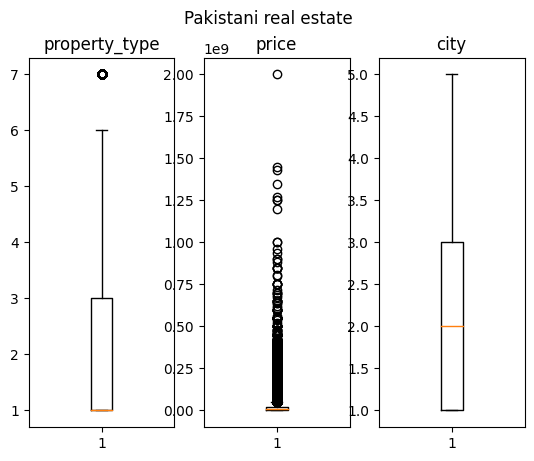

In [ ]:
plt.subplot(1, 3, 1)
plt.boxplot(zameen_data2['property_type'])
plt.title("property_type")

plt.subplot(1, 3, 2)
plt.boxplot(zameen_data2['price'])
plt.title("price")

plt.subplot(1, 3, 3)
plt.boxplot(zameen_data2['city'])
plt.title("city")

plt.suptitle("Pakistani real estate")
plt.show()

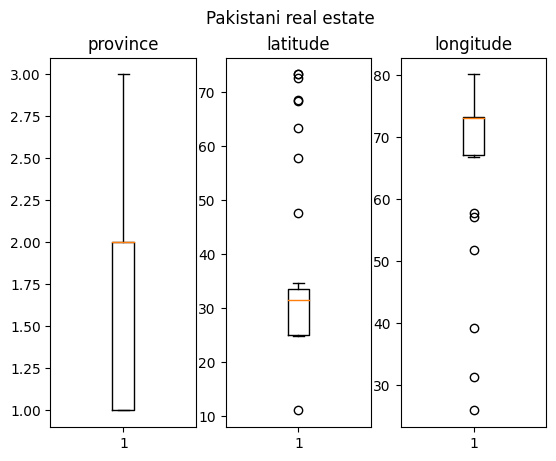

In [ ]:
plt.subplot(1, 3, 1)
plt.boxplot(zameen_data2['province'])
plt.title("province")

plt.subplot(1, 3, 2)
plt.boxplot(zameen_data2["latitude"])
plt.title("latitude")

plt.subplot(1, 3, 3)
plt.boxplot(zameen_data2["longitude"])
plt.title("longitude")

plt.suptitle("Pakistani real estate")
plt.show()

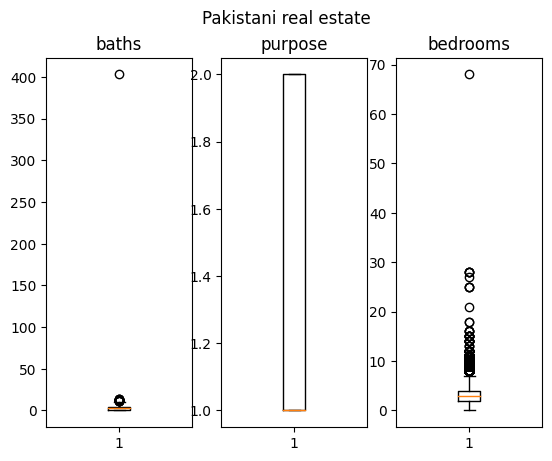

In [ ]:
plt.subplot(1, 3, 1)
plt.boxplot(zameen_data2['baths'])
plt.title("baths")

plt.subplot(1, 3, 2)
plt.boxplot(zameen_data2['purpose'])
plt.title("purpose")

plt.subplot(1, 3, 3)
plt.boxplot(zameen_data2["bedrooms"])
plt.title("bedrooms")

plt.suptitle("Pakistani real estate")
plt.show()

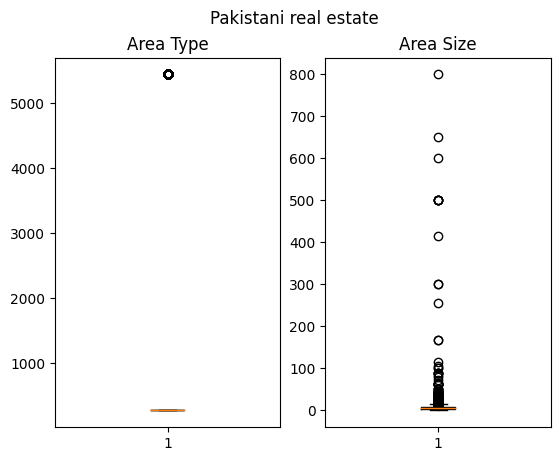

In [ ]:
plt.subplot(1, 2, 1)
plt.boxplot(zameen_data2['Area Type'])
plt.title("Area Type")

plt.subplot(1, 2, 2)
plt.boxplot(zameen_data2['Area Size'])
plt.title("Area Size")

plt.suptitle("Pakistani real estate")
plt.show()

<Axes: >

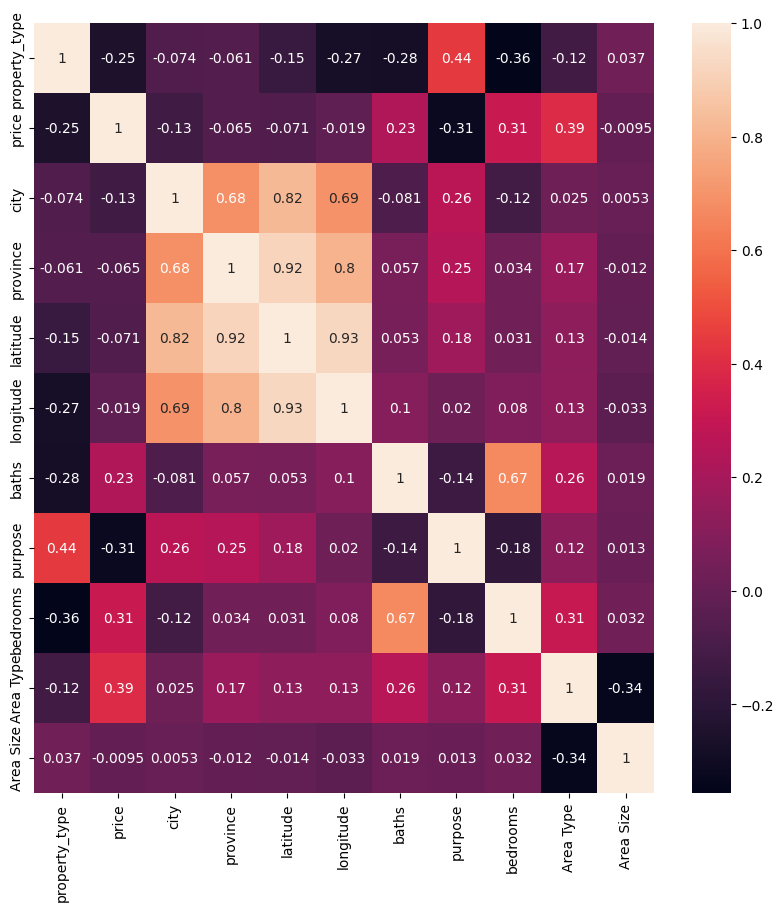

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(zameen_data2.corr(),annot=True)

# **Raw Data**

zameen_data2

MAE = 15154934.50

MSE = 1026194687942128.12

RMSE = 32034273.64

R2 = 0.177


## Data Preparation

In [ ]:
raw_data = zameen_data2.copy()
raw_data.head()

,property_type,price,city,province,latitude,longitude,baths,purpose,bedrooms,Area Type,Area Size
0,1,4400000,1,1,24.893209,67.195473,2,1,2,272.25,0.0
1,1,12500000,2,2,31.474097,74.263802,5,1,5,272.25,0.0
2,1,18000000,2,2,31.462347,74.293642,3,1,3,272.25,0.0
3,1,16500000,3,3,33.648922,73.038969,4,1,5,272.25,0.0
4,1,31500000,3,3,33.692638,73.218813,0,1,0,272.25,0.0


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  int64  
 1   price          168446 non-null  int64  
 2   city           168446 non-null  int64  
 3   province       168446 non-null  int64  
 4   latitude       168446 non-null  float64
 5   longitude      168446 non-null  float64
 6   baths          168446 non-null  int64  
 7   purpose        168446 non-null  int64  
 8   bedrooms       168446 non-null  int64  
 9   Area Type      168446 non-null  float64
 10  Area Size      168446 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 14.1 MB


In [ ]:
raw_data.describe()

,property_type,price,city,province,latitude,longitude,baths,purpose,bedrooms,Area Type,Area Size
count,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.956781,1.776576e+07,2.257014,1.863113,29.859519,71.239804,2.874227,1.283717,3.179422,1214.299391,5.892188
std,1.339831,3.531003e+07,1.203269,0.750013,3.807870,3.133042,2.463400,0.450802,1.971401,1996.384881,5.778327
min,1.000000,0.000000e+00,1.000000,1.000000,11.052446,25.906027,0.000000,1.000000,0.000000,272.250000,0.000000
25%,1.000000,1.750000e+05,1.000000,1.000000,24.948536,67.130363,0.000000,1.000000,2.000000,272.250000,3.000000
50%,1.000000,8.500000e+06,2.000000,2.000000,31.459784,73.056182,3.000000,1.000000,3.000000,272.250000,5.000000
75%,3.000000,1.950000e+07,3.000000,2.000000,33.560887,73.259870,4.000000,2.000000,4.000000,272.250000,8.000000
max,7.000000,2.000000e+09,5.000000,3.000000,73.184088,80.161430,403.000000,2.000000,68.000000,5445.000000,800.000000


## Regression

<Axes: >

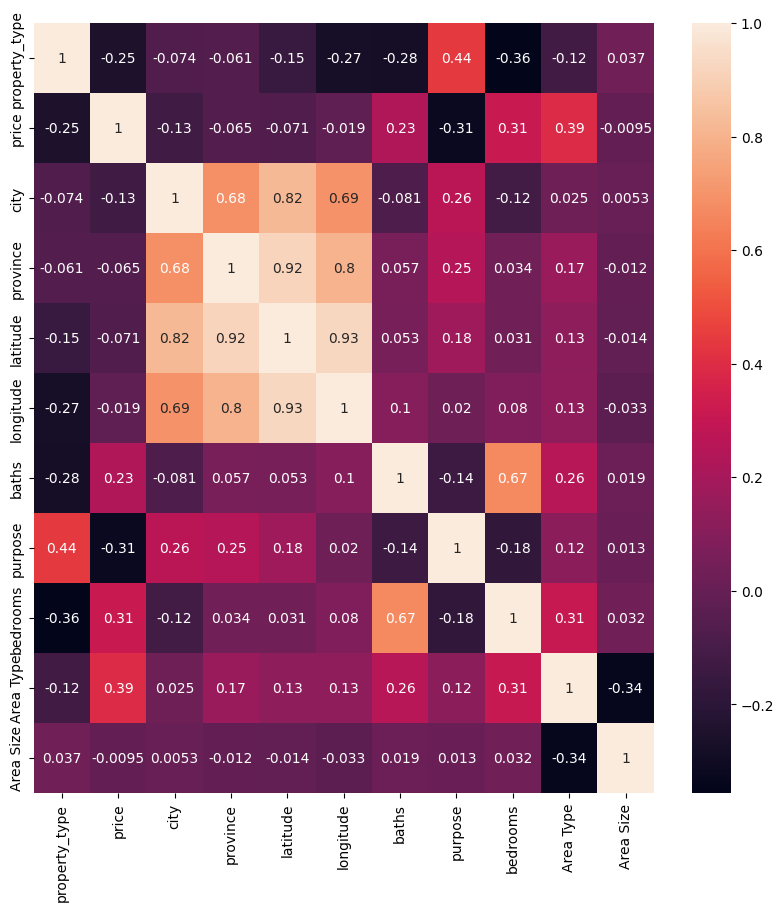

In [ ]:
# Check Corr
plt.figure(figsize=(10,10))
sns.heatmap(raw_data.corr(), annot=True)

In [ ]:
raw_data.columns

Index(['property_type', 'price', 'city', 'province', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'Area Type', 'Area Size'],
      dtype='object')

In [ ]:
# Calculate intercept and coef
x = raw_data[['property_type', 'city', 'province', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'Area Size']]
y = raw_data['price']

rawD_predict = linear_model.LinearRegression()
rawD_predict.fit(x,y)

print('intercept =', rawD_predict.intercept_)
print('coef = ', rawD_predict.coef_)

intercept = 89129879.994114
coef =  [ -2060964.89318232   1024473.81437053   8173735.51037644
  -2053009.24471643   -174101.65207953    377370.94738797
 -19422110.9885942    4135621.20913449    -79480.89932795]


In [ ]:
# Perdiction
predict_DT = raw_data.copy()
predict = rawD_predict.predict(x)
predict_DT['Predict'] = predict
predict_DT

,property_type,price,city,province,latitude,longitude,baths,purpose,bedrooms,Area Type,Area Size,Predict
0,1,4400000,1,1,24.893209,67.195473,2,1,2,272.25,0.0,2.306617e+07
1,1,12500000,2,2,31.474097,74.263802,5,1,5,272.25,0.0,3.106212e+07
2,1,18000000,2,2,31.462347,74.293642,3,1,3,272.25,0.0,2.205506e+07
3,1,16500000,3,3,33.648922,73.038969,4,1,5,272.25,0.0,3.563127e+07
4,1,31500000,3,3,33.692638,73.218813,0,1,0,272.25,0.0,1.332262e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
168441,1,20000000,3,3,33.713488,73.162680,7,1,5,272.25,9.9,3.582243e+07
168442,2,100000000,4,2,33.292707,72.759989,2,1,2,5445.00,90.0,6.886039e+06
168443,4,48000,3,3,33.646421,73.045263,2,2,3,5445.00,90.0,-6.148963e+06
168444,1,220000000,2,2,31.478891,74.329348,9,1,5,5445.00,90.0,2.539707e+07


In [ ]:
# Calculate MAE, MSE, RMSE, and R2
MAE = metrics.mean_absolute_error(predict_DT['price'], predict_DT['Predict'])
print(f'MAE = {MAE:.2f}')

MSE = metrics.mean_squared_error(predict_DT['price'], predict_DT['Predict'])
print(f'MSE = {MSE:.2f}')

RMSE = (np.sqrt(MSE))
print(f'RMSE = {RMSE:.2f}')

r2 = metrics.r2_score(predict_DT['price'], predict_DT['Predict'])
print(f'R2 = {r2:.3f}')

MAE = 15154934.50
MSE = 1026194687942128.12
RMSE = 32034273.64
R2 = 0.177


# **Model 1**

Remove Outlier "All"


MAE = 5529255.946

MSE = 84761990260013.031

RMSE = 9206627.518

R2 = 0.505

## Data Preparation

### 1. Paring

In [ ]:
model1 = raw_data.copy()
model1.head()

,property_type,price,city,province,latitude,longitude,baths,purpose,bedrooms,Area Type,Area Size
0,1,4400000,1,1,24.893209,67.195473,2,1,2,272.25,0.0
1,1,12500000,2,2,31.474097,74.263802,5,1,5,272.25,0.0
2,1,18000000,2,2,31.462347,74.293642,3,1,3,272.25,0.0
3,1,16500000,3,3,33.648922,73.038969,4,1,5,272.25,0.0
4,1,31500000,3,3,33.692638,73.218813,0,1,0,272.25,0.0


In [ ]:
model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  int64  
 1   price          168446 non-null  int64  
 2   city           168446 non-null  int64  
 3   province       168446 non-null  int64  
 4   latitude       168446 non-null  float64
 5   longitude      168446 non-null  float64
 6   baths          168446 non-null  int64  
 7   purpose        168446 non-null  int64  
 8   bedrooms       168446 non-null  int64  
 9   Area Type      168446 non-null  float64
 10  Area Size      168446 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 14.1 MB


In [ ]:
model1.describe()

,property_type,price,city,province,latitude,longitude,baths,purpose,bedrooms,Area Type,Area Size
count,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.956781,1.776576e+07,2.257014,1.863113,29.859519,71.239804,2.874227,1.283717,3.179422,1214.299391,5.892188
std,1.339831,3.531003e+07,1.203269,0.750013,3.807870,3.133042,2.463400,0.450802,1.971401,1996.384881,5.778327
min,1.000000,0.000000e+00,1.000000,1.000000,11.052446,25.906027,0.000000,1.000000,0.000000,272.250000,0.000000
25%,1.000000,1.750000e+05,1.000000,1.000000,24.948536,67.130363,0.000000,1.000000,2.000000,272.250000,3.000000
50%,1.000000,8.500000e+06,2.000000,2.000000,31.459784,73.056182,3.000000,1.000000,3.000000,272.250000,5.000000
75%,3.000000,1.950000e+07,3.000000,2.000000,33.560887,73.259870,4.000000,2.000000,4.000000,272.250000,8.000000
max,7.000000,2.000000e+09,5.000000,3.000000,73.184088,80.161430,403.000000,2.000000,68.000000,5445.000000,800.000000


### 2. Correcting

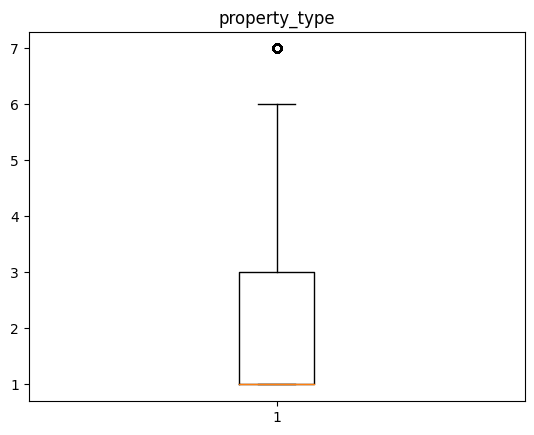

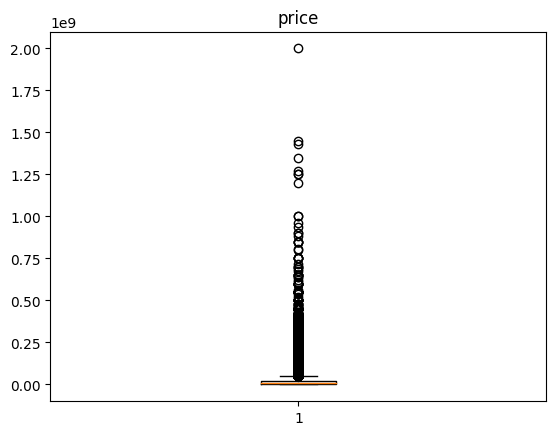

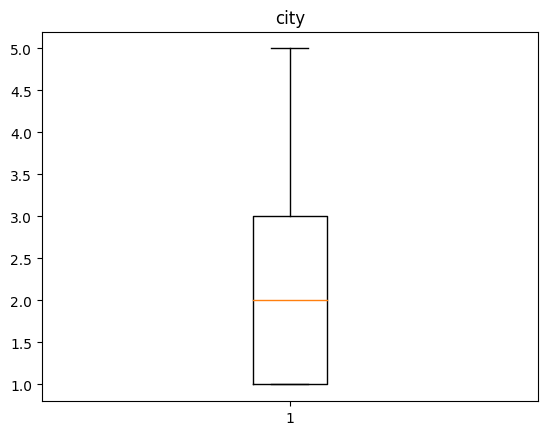

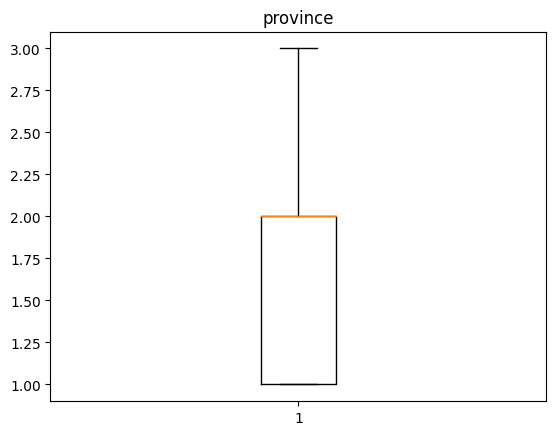

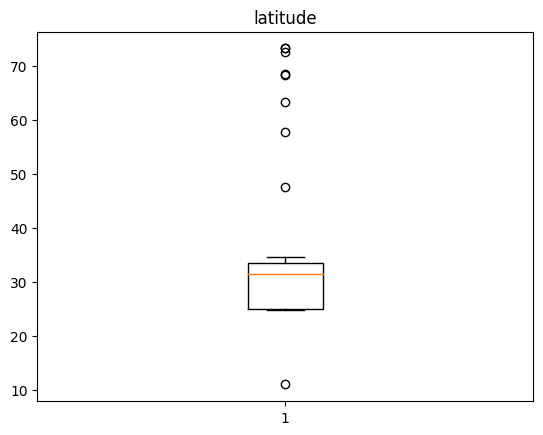

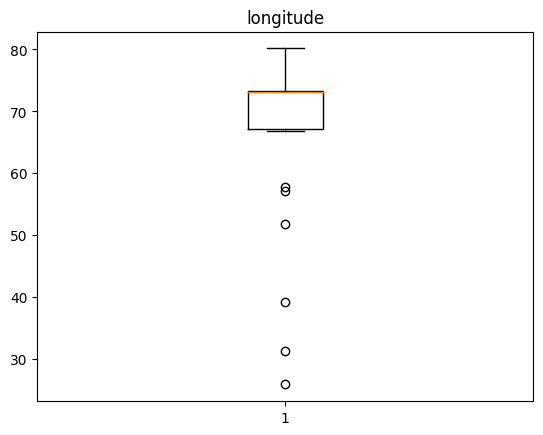

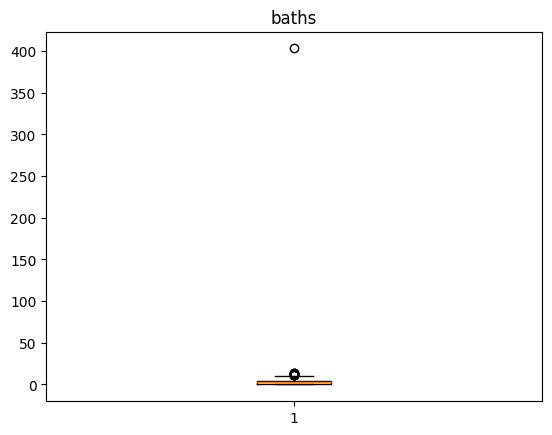

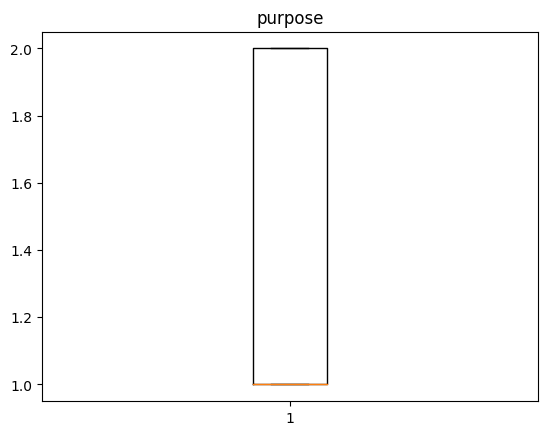

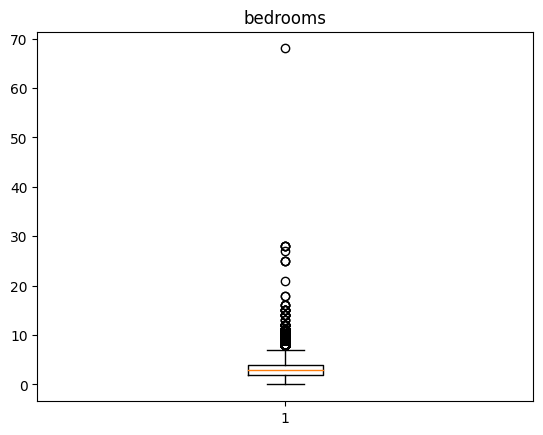

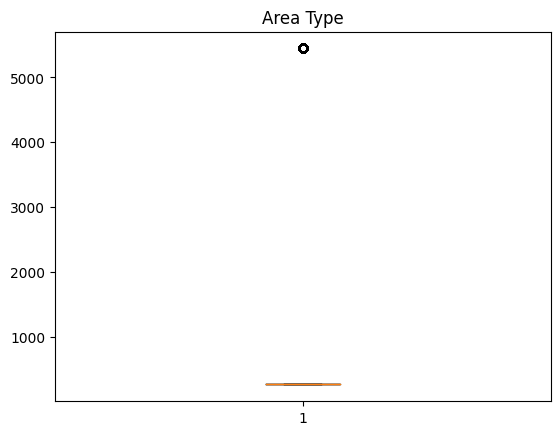

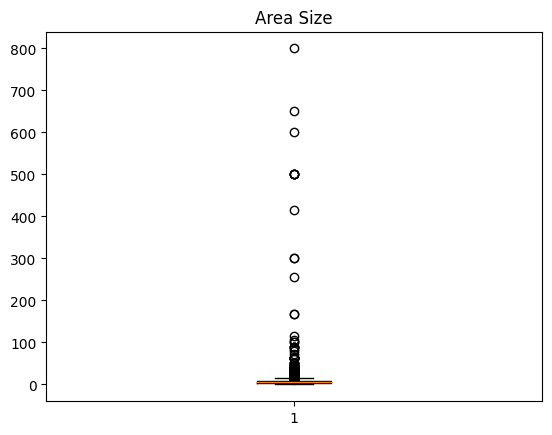

In [ ]:
#Check Outlier
for i in model1.columns :
  plt.boxplot(model1[i])
  plt.title(f'{i}')
  plt.show()
  print()

In [ ]:
#function to remove outlier
def outlier(name) :
  Q3 = np.percentile(model1[f'{name}'],75)
  Q1 = np.percentile(model1[f'{name}'],25)
  IQR = Q3 - Q1
  Upper_bound = Q3 + ( 1.5 * IQR )
  Lower_bound = Q1 - ( 1.5 * IQR )
  return IQR,Upper_bound,Lower_bound

#Remove outlier
#property_type
IQR,Upper_bound,Lower_bound = outlier('property_type')
model1 = model1[ (model1['property_type'] <= Upper_bound) & (model1['property_type'] >= Lower_bound) ]

#city
IQR,Upper_bound,Lower_bound = outlier('city')
model1 = model1[ (model1['city'] <= Upper_bound) & (model1['city'] >= Lower_bound) ]

#province
IQR,Upper_bound,Lower_bound = outlier('province')
model1 = model1[ (model1['province'] <= Upper_bound) & (model1['province'] >= Lower_bound) ]

#latitude
IQR,Upper_bound,Lower_bound = outlier('latitude')
model1 = model1[ (model1['latitude'] <= Upper_bound) & (model1['latitude'] >= Lower_bound) ]

#longitude
IQR,Upper_bound,Lower_bound = outlier('longitude')
model1 = model1[ (model1['longitude'] <= Upper_bound) & (model1['longitude'] >= Lower_bound) ]

#baths
IQR,Upper_bound,Lower_bound = outlier('baths')
model1 = model1[ (model1['baths'] <= Upper_bound) & (model1['baths'] >= Lower_bound) ]

#purpose
IQR,Upper_bound,Lower_bound = outlier('purpose')
model1 = model1[ (model1['purpose'] <= Upper_bound) & (model1['purpose'] >= Lower_bound) ]

#bedrooms
IQR,Upper_bound,Lower_bound = outlier('bedrooms')
model1 = model1[ (model1['bedrooms'] <= Upper_bound) & (model1['bedrooms'] >= Lower_bound) ]

#Area Type
IQR,Upper_bound,Lower_bound = outlier('Area Type')
model1 = model1[ (model1['Area Type'] <= Upper_bound) & (model1['Area Type'] >= Lower_bound) ]

#Area Size
IQR,Upper_bound,Lower_bound = outlier('Area Size')
model1 = model1[ (model1['Area Size'] <= Upper_bound) & (model1['Area Size'] >= Lower_bound) ]

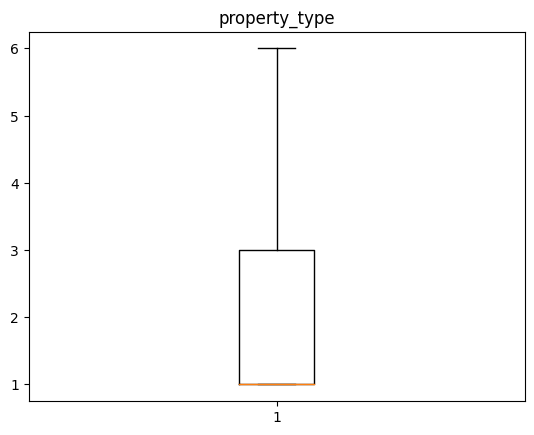

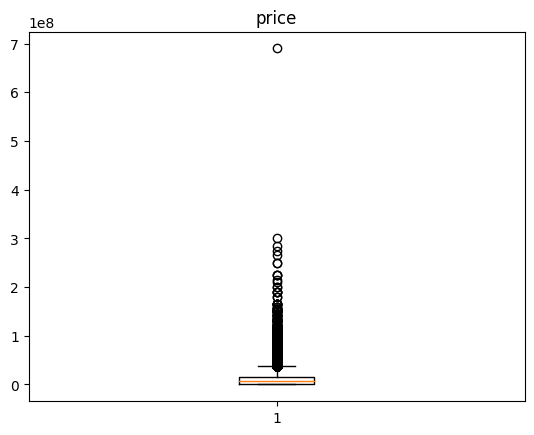

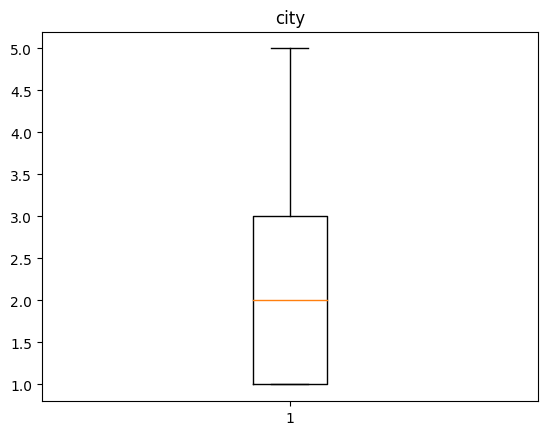

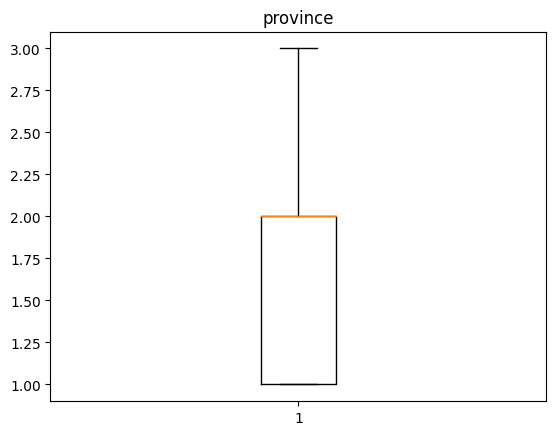

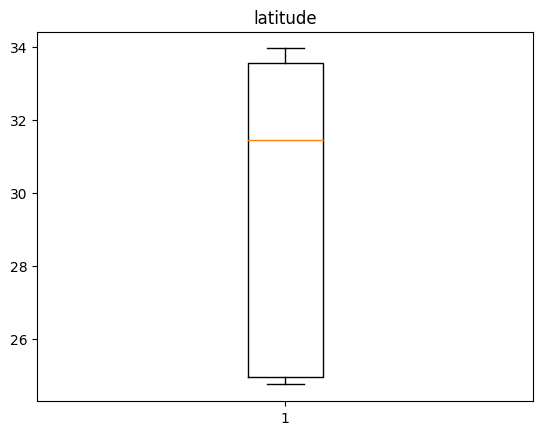

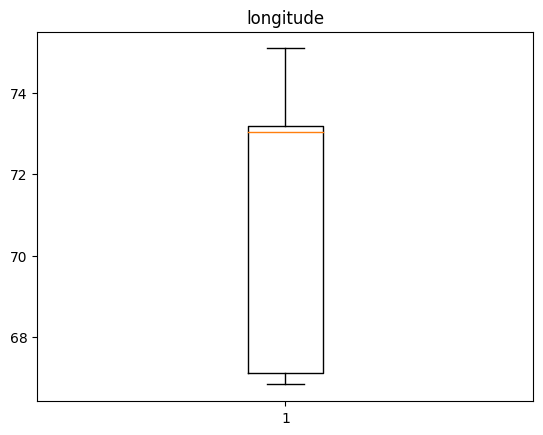

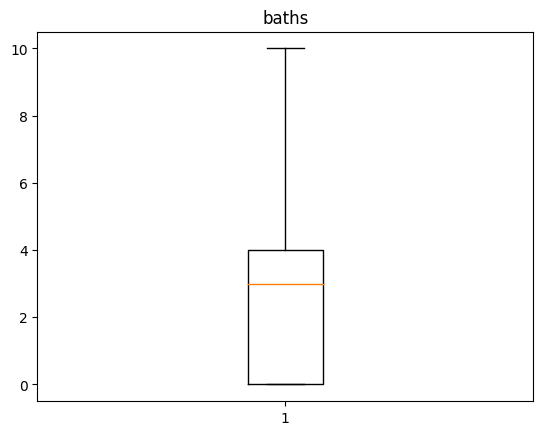

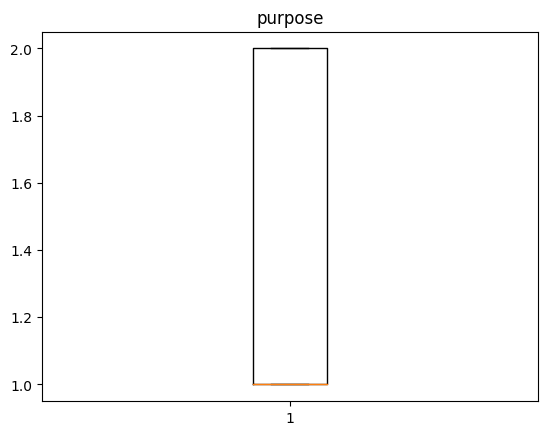

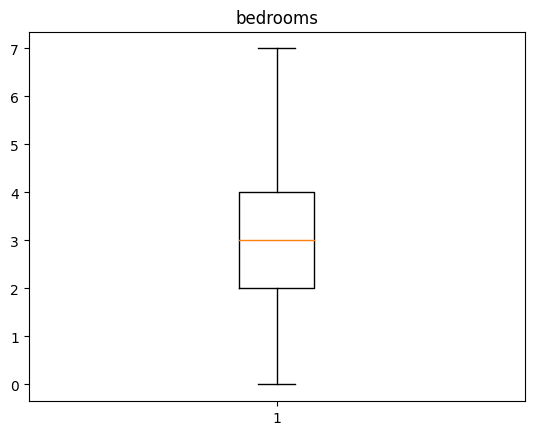

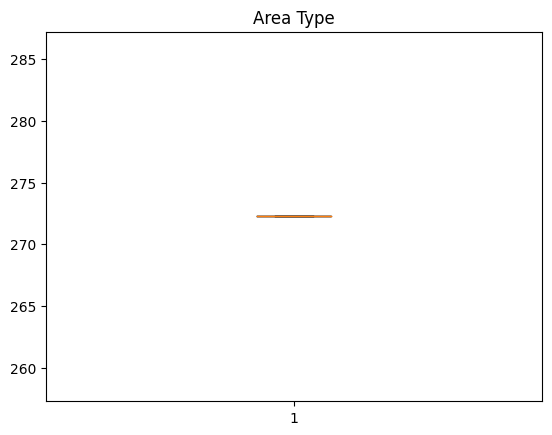

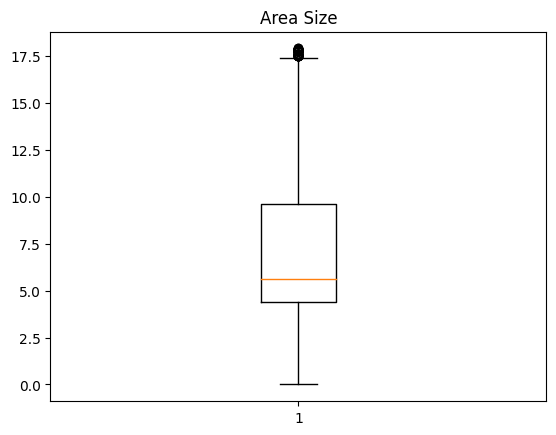

In [ ]:
# Check outlier
for i in model1.columns :
  plt.boxplot(model1[i])
  plt.title(f'{i}')
  plt.show()
  print()

### 3. Check Data

In [ ]:
model1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135432 entries, 0 to 168441
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  135432 non-null  int64  
 1   price          135432 non-null  int64  
 2   city           135432 non-null  int64  
 3   province       135432 non-null  int64  
 4   latitude       135432 non-null  float64
 5   longitude      135432 non-null  float64
 6   baths          135432 non-null  int64  
 7   purpose        135432 non-null  int64  
 8   bedrooms       135432 non-null  int64  
 9   Area Type      135432 non-null  float64
 10  Area Size      135432 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 12.4 MB


## Regression

<Axes: >

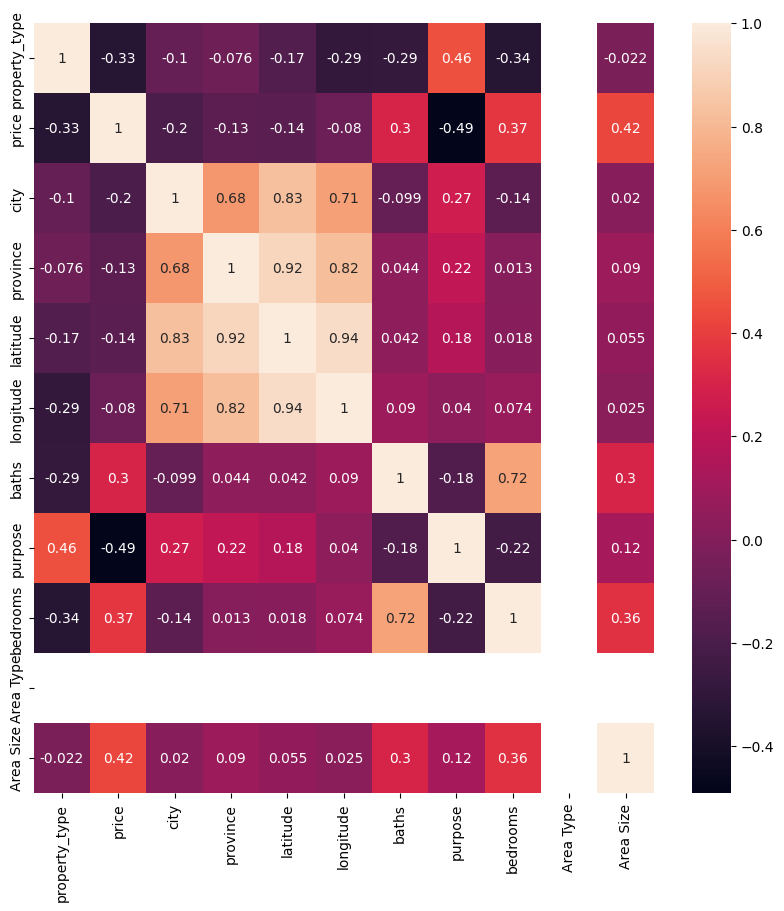

In [ ]:
# Check Corr
plt.figure(figsize=(10,10))
sns.heatmap(model1.corr(), annot=True)

In [ ]:
model1.columns

Index(['property_type', 'price', 'city', 'province', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'Area Type', 'Area Size'],
      dtype='object')

In [ ]:
# Calculate intercept and coef
x = model1[['property_type', 'city', 'province', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'Area Type', 'Area Size']]
y = model1['price']

model1_predict = linear_model.LinearRegression()
model1_predict.fit(x,y)

print('intercept =', model1_predict.intercept_)
print('coef = ', model1_predict.coef_)

intercept = 52100677.84428402
coef =  [ -1179373.68376529    342467.35174365   1776260.12657255
   -500598.19839701   -333785.3996163      43626.2170862
 -14333903.76045759    571532.93498252         0.
   1802388.5040561 ]


In [ ]:
# Perdiction
predict_DT01 = model1.copy()
predict = model1_predict.predict(x)
predict_DT01['Predict'] = predict
predict_DT01

,property_type,price,city,province,latitude,longitude,baths,purpose,bedrooms,Area Type,Area Size,Predict
0,1,4400000,1,1,24.893209,67.195473,2,1,2,272.25,0.0,5.046083e+06
1,1,12500000,2,2,31.474097,74.263802,5,1,5,272.25,0.0,3.356602e+06
2,1,18000000,2,2,31.462347,74.293642,3,1,3,272.25,0.0,2.122206e+06
3,1,16500000,3,3,33.648922,73.038969,4,1,5,272.25,0.0,4.751821e+06
4,1,31500000,3,3,33.692638,73.218813,0,1,0,272.25,0.0,1.637738e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
168436,3,46000,3,3,33.538087,73.164536,0,2,3,272.25,9.9,4.598817e+06
168438,1,17500000,1,1,24.951009,67.150744,5,1,7,272.25,9.9,2.586427e+07
168439,5,45000,3,3,33.671890,73.012254,3,2,3,272.25,9.9,2.354796e+06
168440,3,185000,3,3,33.691065,73.016382,3,2,3,272.25,9.9,4.702567e+06


In [ ]:
# Calculate MAE, MSE, RMSE, and R2
MAE = metrics.mean_absolute_error(predict_DT01['price'], predict_DT01['Predict'])
print(f'MAE = {MAE:.3f}')

MSE = metrics.mean_squared_error(predict_DT01['price'], predict_DT01['Predict'])
print(f'MSE = {MSE:.3f}')

RMSE = (np.sqrt(MSE))
print(f'RMSE = {RMSE:.3f}')

r2 = metrics.r2_score(predict_DT01['price'], predict_DT01['Predict'])
print(f'R2 = {r2:.3f}')

MAE = 5553278.140
MSE = 85523964244479.656
RMSE = 9247916.752
R2 = 0.505


# **Model 2**

Delete Value "latitude, longitude"

MAE = 5553278.14

MSE = 86471370347255.59

RMSE = 9298998.35

R2 = 0.499

## Data Preparation

### 1. Paring

In [ ]:
model2 = model1.copy()
model2.head()

,property_type,price,city,province,latitude,longitude,baths,purpose,bedrooms,Area Type,Area Size
0,1,4400000,1,1,24.893209,67.195473,2,1,2,272.25,0.0
1,1,12500000,2,2,31.474097,74.263802,5,1,5,272.25,0.0
2,1,18000000,2,2,31.462347,74.293642,3,1,3,272.25,0.0
3,1,16500000,3,3,33.648922,73.038969,4,1,5,272.25,0.0
4,1,31500000,3,3,33.692638,73.218813,0,1,0,272.25,0.0


In [ ]:
model2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135432 entries, 0 to 168441
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  135432 non-null  int64  
 1   price          135432 non-null  int64  
 2   city           135432 non-null  int64  
 3   province       135432 non-null  int64  
 4   latitude       135432 non-null  float64
 5   longitude      135432 non-null  float64
 6   baths          135432 non-null  int64  
 7   purpose        135432 non-null  int64  
 8   bedrooms       135432 non-null  int64  
 9   Area Type      135432 non-null  float64
 10  Area Size      135432 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 12.4 MB


### 2. Delete Value

In [ ]:
model2.drop(['latitude'], axis=1, inplace=True)
model2.drop(['longitude'], axis=1, inplace=True)

In [ ]:
model2

,property_type,price,city,province,baths,purpose,bedrooms,Area Type,Area Size
0,1,4400000,1,1,2,1,2,272.25,0.0
1,1,12500000,2,2,5,1,5,272.25,0.0
2,1,18000000,2,2,3,1,3,272.25,0.0
3,1,16500000,3,3,4,1,5,272.25,0.0
4,1,31500000,3,3,0,1,0,272.25,0.0
...,...,...,...,...,...,...,...,...,...
168436,3,46000,3,3,0,2,3,272.25,9.9
168438,1,17500000,1,1,5,1,7,272.25,9.9
168439,5,45000,3,3,3,2,3,272.25,9.9
168440,3,185000,3,3,3,2,3,272.25,9.9


In [ ]:
model2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135432 entries, 0 to 168441
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  135432 non-null  int64  
 1   price          135432 non-null  int64  
 2   city           135432 non-null  int64  
 3   province       135432 non-null  int64  
 4   baths          135432 non-null  int64  
 5   purpose        135432 non-null  int64  
 6   bedrooms       135432 non-null  int64  
 7   Area Type      135432 non-null  float64
 8   Area Size      135432 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 10.3 MB


In [ ]:
model2.describe()

,property_type,price,city,province,baths,purpose,bedrooms,Area Type,Area Size
count,135432.000000,1.354320e+05,135432.000000,135432.000000,135432.000000,135432.000000,135432.000000,135432.00,135432.000000
mean,2.032105,1.093769e+07,2.246877,1.806486,2.534719,1.260374,2.824938,272.25,6.745443
std,1.317518,1.313826e+07,1.249905,0.735066,1.962694,0.438840,1.637687,0.00,3.316431
min,1.000000,0.000000e+00,1.000000,1.000000,0.000000,1.000000,0.000000,272.25,0.000000
25%,1.000000,1.300000e+05,1.000000,1.000000,0.000000,1.000000,2.000000,272.25,4.400000
50%,1.000000,7.800000e+06,2.000000,2.000000,3.000000,1.000000,3.000000,272.25,5.600000
75%,3.000000,1.500000e+07,3.000000,2.000000,4.000000,2.000000,4.000000,272.25,9.600000
max,6.000000,6.900000e+08,5.000000,3.000000,10.000000,2.000000,7.000000,272.25,17.900000


## Regression

<Axes: >

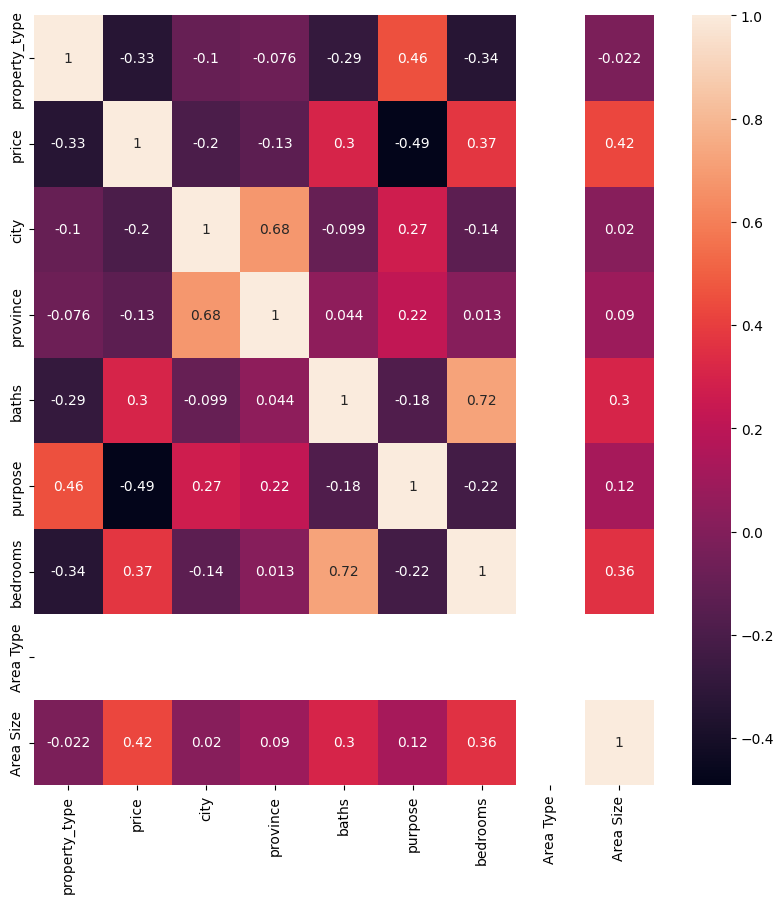

In [ ]:
#Check Corr
plt.figure(figsize=(10,10))
sns.heatmap(model2.corr(), annot=True)

In [ ]:
model2.columns

Index(['property_type', 'price', 'city', 'province', 'baths', 'purpose',
       'bedrooms', 'Area Type', 'Area Size'],
      dtype='object')

In [ ]:
# Calculate intercept and coef
x = model2[['property_type', 'city', 'province', 'baths', 'purpose',
       'bedrooms', 'Area Type', 'Area Size']]
y = model2['price']

model2_predict = linear_model.LinearRegression()
model2_predict.fit(x,y)

print('intercept =', model2_predict.intercept_)
print('coef = ', model2_predict.coef_)

intercept = 19346358.79261607
coef =  [  -974140.23624886   -503124.57291609   -845541.36767927
     23491.85569449 -13977945.13611955    503152.23747451
         0.           1833138.23123343]


In [ ]:
# Perdiction
predict_DT02 = model2.copy()
predict = model2_predict.predict(x)
predict_DT02['Predict'] = predict
predict_DT02

,property_type,price,city,province,baths,purpose,bedrooms,Area Type,Area Size,Predict
0,1,4400000,1,1,2,1,2,272.25,0.0,4.098896e+06
1,1,12500000,2,2,5,1,5,272.25,0.0,4.330162e+06
2,1,18000000,2,2,3,1,3,272.25,0.0,3.276874e+06
3,1,16500000,3,3,4,1,5,272.25,0.0,2.958004e+06
4,1,31500000,3,3,0,1,0,272.25,0.0,3.482756e+05
...,...,...,...,...,...,...,...,...,...,...
168436,3,46000,3,3,0,2,3,272.25,9.9,4.079575e+06
168438,1,17500000,1,1,5,1,7,272.25,9.9,2.483320e+07
168439,5,45000,3,3,3,2,3,272.25,9.9,2.201770e+06
168440,3,185000,3,3,3,2,3,272.25,9.9,4.150051e+06


In [ ]:
# Calculate MAE, MSE, RMSE, and R2
MA = metrics.mean_absolute_error(predict_DT02['price'], predict_DT02['Predict'])
print(f'MAE = {MAE:.2f}')

MSE = metrics.mean_squared_error(predict_DT02['price'], predict_DT02['Predict'])
print(f'MSE = {MSE:.2f}')

RMSE = (np.sqrt(MSE))
print(f'RMSE = {RMSE:.2f}')

r2 = metrics.r2_score(predict_DT02['price'], predict_DT02['Predict'])
print(f'R2 = {r2:.3f}')

MAE = 5553278.14
MSE = 86471370347255.59
RMSE = 9298998.35
R2 = 0.499


# **Model 2.1**

Remove Outlier from "Model 3"

MAE = 5538334.193

MSE = 85699218124983.625

RMSE = 9257387.219

R2 = 0.499

## Data Preparation

### 1. Paring

In [ ]:
model2_1 = model2.copy()
model2_1

,property_type,price,city,province,baths,purpose,bedrooms,Area Type,Area Size
0,1,4400000,1,1,2,1,2,272.25,0.0
1,1,12500000,2,2,5,1,5,272.25,0.0
2,1,18000000,2,2,3,1,3,272.25,0.0
3,1,16500000,3,3,4,1,5,272.25,0.0
4,1,31500000,3,3,0,1,0,272.25,0.0
...,...,...,...,...,...,...,...,...,...
168436,3,46000,3,3,0,2,3,272.25,9.9
168438,1,17500000,1,1,5,1,7,272.25,9.9
168439,5,45000,3,3,3,2,3,272.25,9.9
168440,3,185000,3,3,3,2,3,272.25,9.9


In [ ]:
model2_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135432 entries, 0 to 168441
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  135432 non-null  int64  
 1   price          135432 non-null  int64  
 2   city           135432 non-null  int64  
 3   province       135432 non-null  int64  
 4   baths          135432 non-null  int64  
 5   purpose        135432 non-null  int64  
 6   bedrooms       135432 non-null  int64  
 7   Area Type      135432 non-null  float64
 8   Area Size      135432 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 10.3 MB


### 2. Remove Outlier

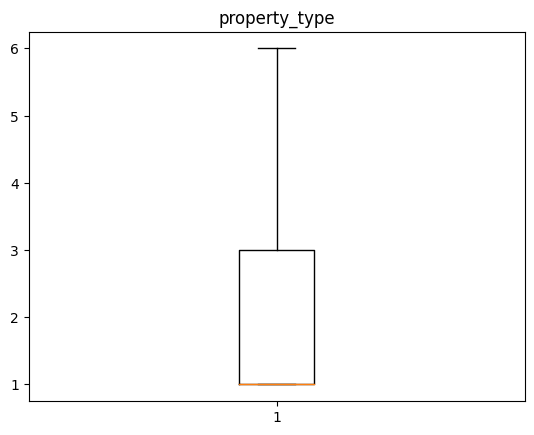

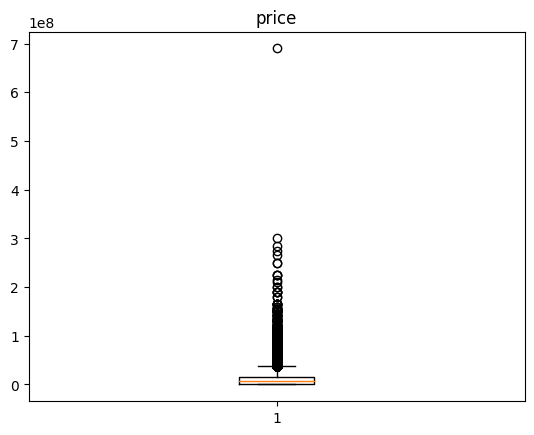

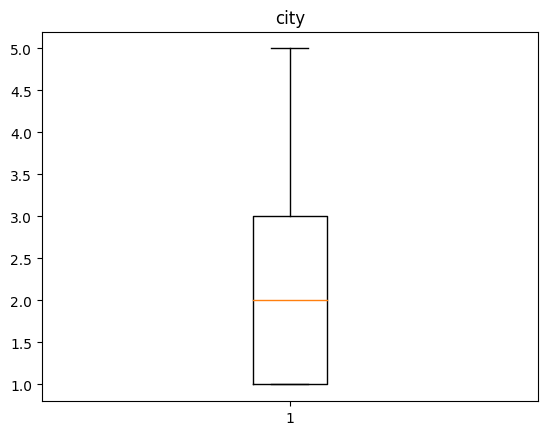

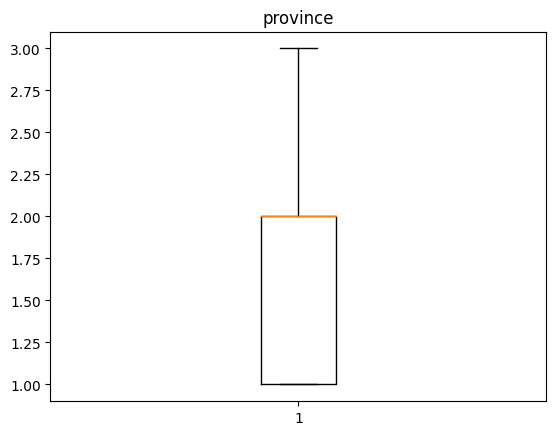

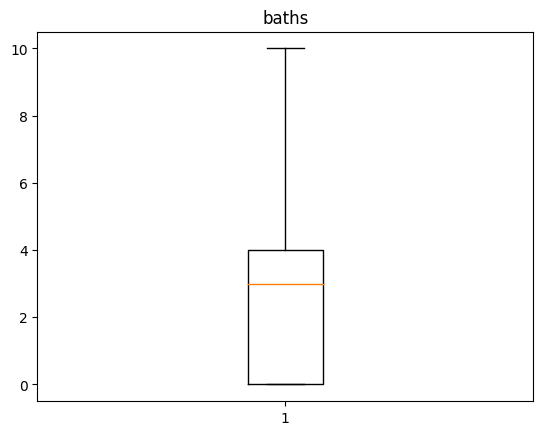

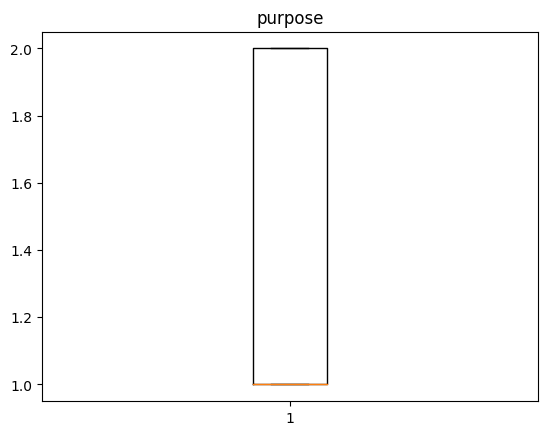

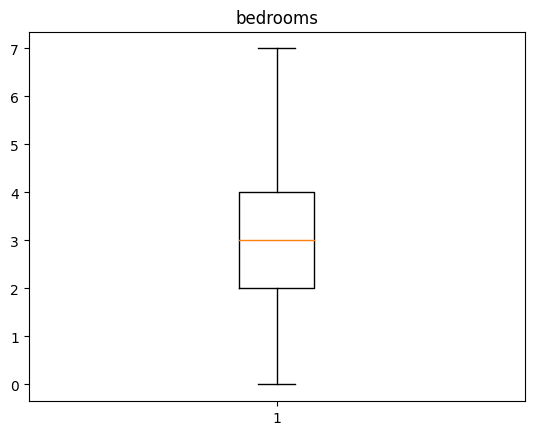

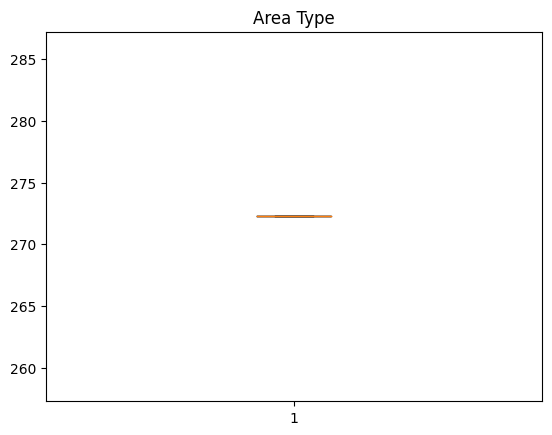

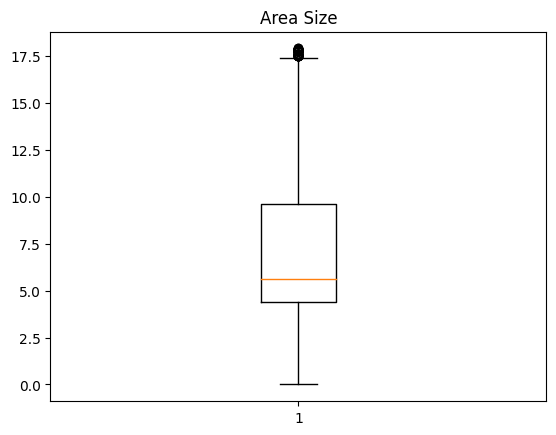

In [ ]:
#Check Outlier
for i in model2_1.columns :
  plt.boxplot(model2_1[i])
  plt.title(f'{i}')
  plt.show()
  print()

In [ ]:
#function to remove outlier
def outlier(name) :
  Q3 = np.percentile(model2_1[f'{name}'],75)
  Q1 = np.percentile(model2_1[f'{name}'],25)
  IQR = Q3 - Q1
  Upper_bound = Q3 + ( 1.5 * IQR )
  Lower_bound = Q1 - ( 1.5 * IQR )
  return IQR,Upper_bound,Lower_bound

#Remove outlier
#property_type
IQR,Upper_bound,Lower_bound = outlier('Area Size')
model2_1 = model2_1[ (model2_1['Area Size'] <= Upper_bound) & (model2_1['Area Size'] >= Lower_bound) ]

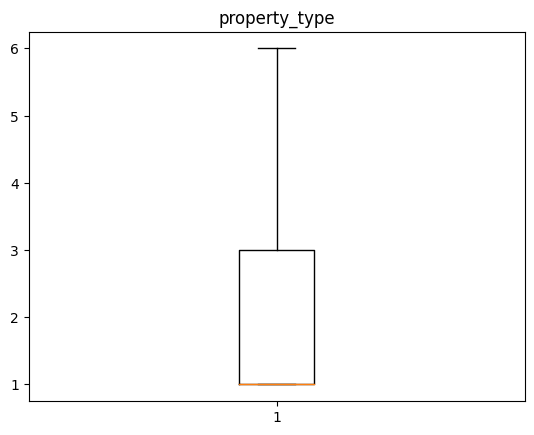

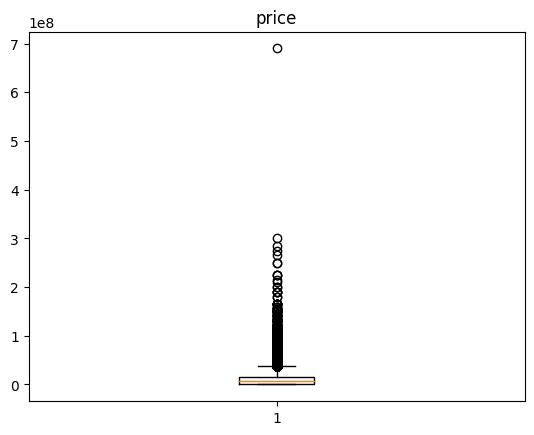

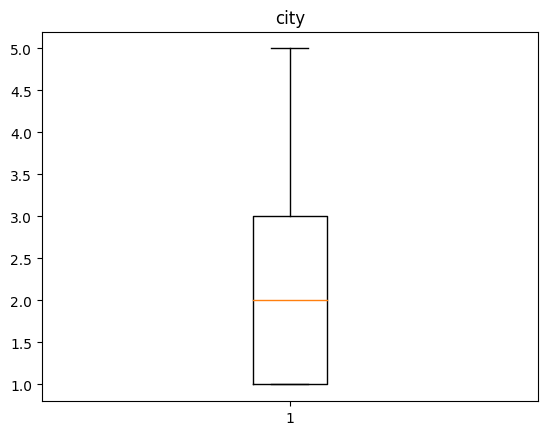

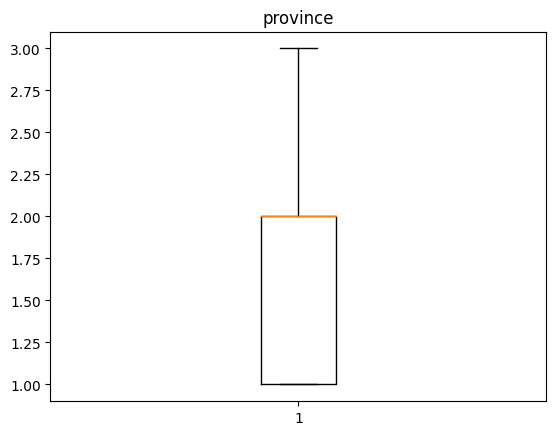

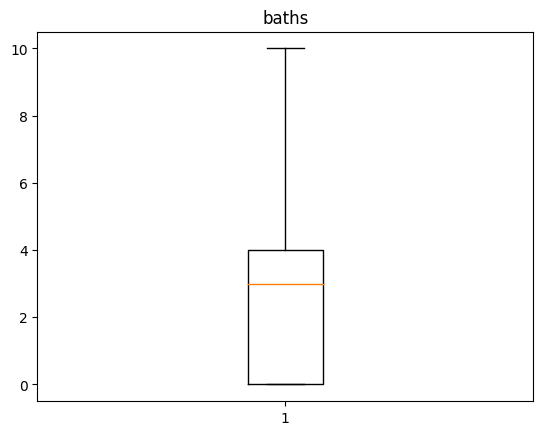

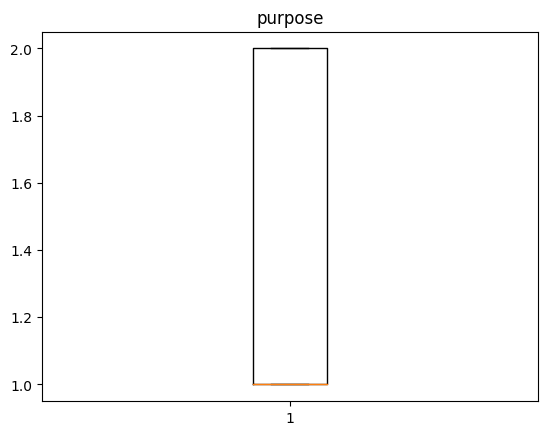

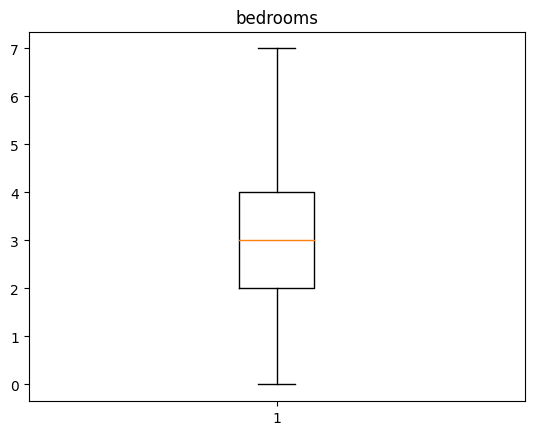

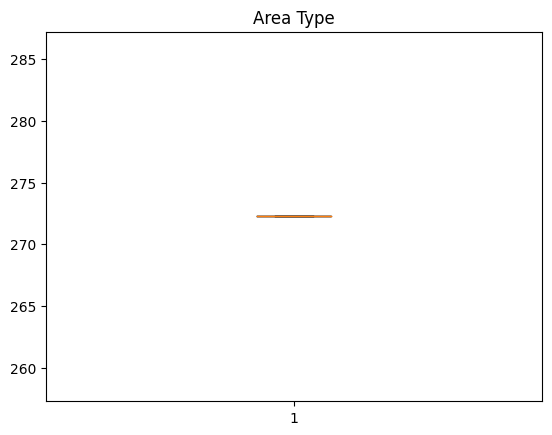

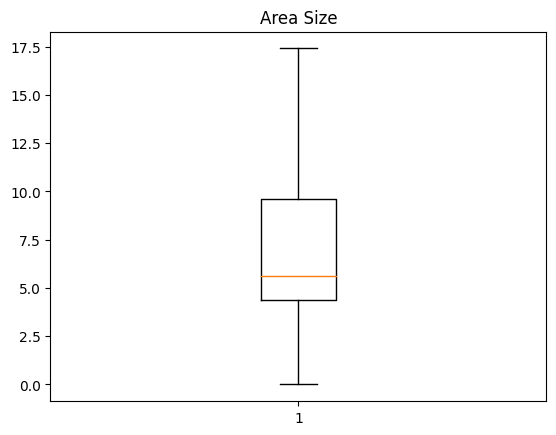

In [ ]:
# Check outlier
for i in model2_1.columns :
  plt.boxplot(model2_1[i])
  plt.title(f'{i}')
  plt.show()
  print()

## Regression

<Axes: >

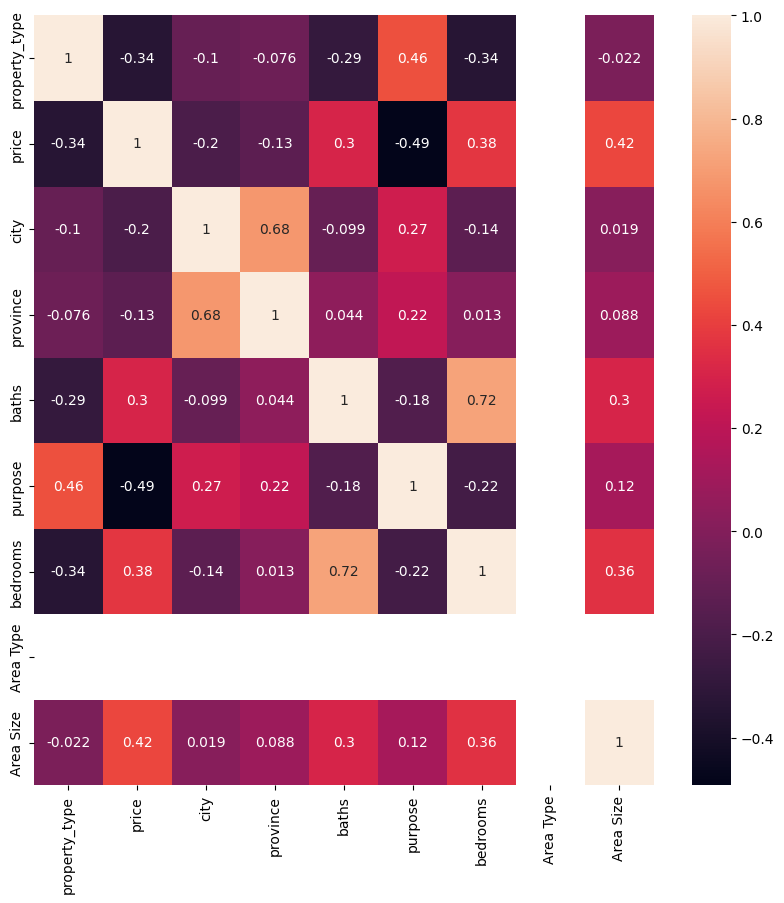

In [ ]:
# Check Corr
plt.figure(figsize=(10,10))
sns.heatmap(model2_1.corr(), annot=True)

In [ ]:
model2_1.columns

Index(['property_type', 'price', 'city', 'province', 'baths', 'purpose',
       'bedrooms', 'Area Type', 'Area Size'],
      dtype='object')

In [ ]:
# Calculate intercept and coef
x = model2_1[['property_type', 'city', 'province', 'baths', 'purpose',
       'bedrooms', 'Area Type', 'Area Size']]
y = model2_1['price']

model2_1_predict = linear_model.LinearRegression()
model2_1_predict.fit(x,y)

print('intercept =', model2_1_predict.intercept_)
print('coef = ', model2_1_predict.coef_)

intercept = 19285396.574040584
coef =  [  -979307.59254416   -507318.2807271    -840021.8880064
     19965.01455478 -13913003.85251125    507741.25514908
         0.           1830776.36375852]


In [ ]:
# Perdiction
predict_DT02_1 = model2_1.copy()
predict = model2_1_predict.predict(x)
predict_DT02_1['Predict'] = predict
predict_DT02_1

,property_type,price,city,province,baths,purpose,bedrooms,Area Type,Area Size,Predict
0,1,4400000,1,1,2,1,2,272.25,0.0,4.101157e+06
1,1,12500000,2,2,5,1,5,272.25,0.0,4.336936e+06
2,1,18000000,2,2,3,1,3,272.25,0.0,3.281524e+06
3,1,16500000,3,3,4,1,5,272.25,0.0,2.969631e+06
4,1,31500000,3,3,0,1,0,272.25,0.0,3.510646e+05
...,...,...,...,...,...,...,...,...,...,...
168436,3,46000,3,3,0,2,3,272.25,9.9,4.127355e+06
168438,1,17500000,1,1,5,1,7,272.25,9.9,2.482444e+07
168439,5,45000,3,3,3,2,3,272.25,9.9,2.228635e+06
168440,3,185000,3,3,3,2,3,272.25,9.9,4.187250e+06


In [ ]:
# Calculate MAE, MSE, RMSE, and R2
MAE = metrics.mean_absolute_error(predict_DT02_1['price'], predict_DT02_1['Predict'])
print(f'MAE = {MAE:.3f}')

MSE = metrics.mean_squared_error(predict_DT02_1['price'], predict_DT02_1['Predict'])
print(f'MSE = {MSE:.3f}')

RMSE = (np.sqrt(MSE))
print(f'RMSE = {RMSE:.3f}')

r2 = metrics.r2_score(predict_DT02_1['price'], predict_DT02_1['Predict'])
print(f'R2 = {r2:.3f}')

MAE = 5538334.193
MSE = 85699218124983.625
RMSE = 9257387.219
R2 = 0.499


# **Model 3**

Delete Value "Property Type"

MAE = 5542897.94

MSE = 85896746050136.67

RMSE = 9268049.74

R2 = 0.498

## Data Prepartion

### 1. Paring

In [ ]:
model3 = model2.copy()
model3.head()

,property_type,price,city,province,baths,purpose,bedrooms,Area Type,Area Size
0,1,4400000,1,1,2,1,2,272.25,0.0
1,1,12500000,2,2,5,1,5,272.25,0.0
2,1,18000000,2,2,3,1,3,272.25,0.0
3,1,16500000,3,3,4,1,5,272.25,0.0
4,1,31500000,3,3,0,1,0,272.25,0.0


In [ ]:
model3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135432 entries, 0 to 168441
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  135432 non-null  int64  
 1   price          135432 non-null  int64  
 2   city           135432 non-null  int64  
 3   province       135432 non-null  int64  
 4   baths          135432 non-null  int64  
 5   purpose        135432 non-null  int64  
 6   bedrooms       135432 non-null  int64  
 7   Area Type      135432 non-null  float64
 8   Area Size      135432 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 10.3 MB


In [ ]:
model3.describe()

,property_type,price,city,province,baths,purpose,bedrooms,Area Type,Area Size
count,135432.000000,1.354320e+05,135432.000000,135432.000000,135432.000000,135432.000000,135432.000000,135432.00,135432.000000
mean,2.032105,1.093769e+07,2.246877,1.806486,2.534719,1.260374,2.824938,272.25,6.745443
std,1.317518,1.313826e+07,1.249905,0.735066,1.962694,0.438840,1.637687,0.00,3.316431
min,1.000000,0.000000e+00,1.000000,1.000000,0.000000,1.000000,0.000000,272.25,0.000000
25%,1.000000,1.300000e+05,1.000000,1.000000,0.000000,1.000000,2.000000,272.25,4.400000
50%,1.000000,7.800000e+06,2.000000,2.000000,3.000000,1.000000,3.000000,272.25,5.600000
75%,3.000000,1.500000e+07,3.000000,2.000000,4.000000,2.000000,4.000000,272.25,9.600000
max,6.000000,6.900000e+08,5.000000,3.000000,10.000000,2.000000,7.000000,272.25,17.900000


### 2. Delete Value

In [ ]:
model3.columns

Index(['property_type', 'price', 'city', 'province', 'baths', 'purpose',
       'bedrooms', 'Area Type', 'Area Size'],
      dtype='object')

In [ ]:
model3.drop(['province'], axis=1, inplace=True)

In [ ]:
model3.columns

Index(['property_type', 'price', 'city', 'baths', 'purpose', 'bedrooms',
       'Area Type', 'Area Size'],
      dtype='object')

## Regression

<Axes: >

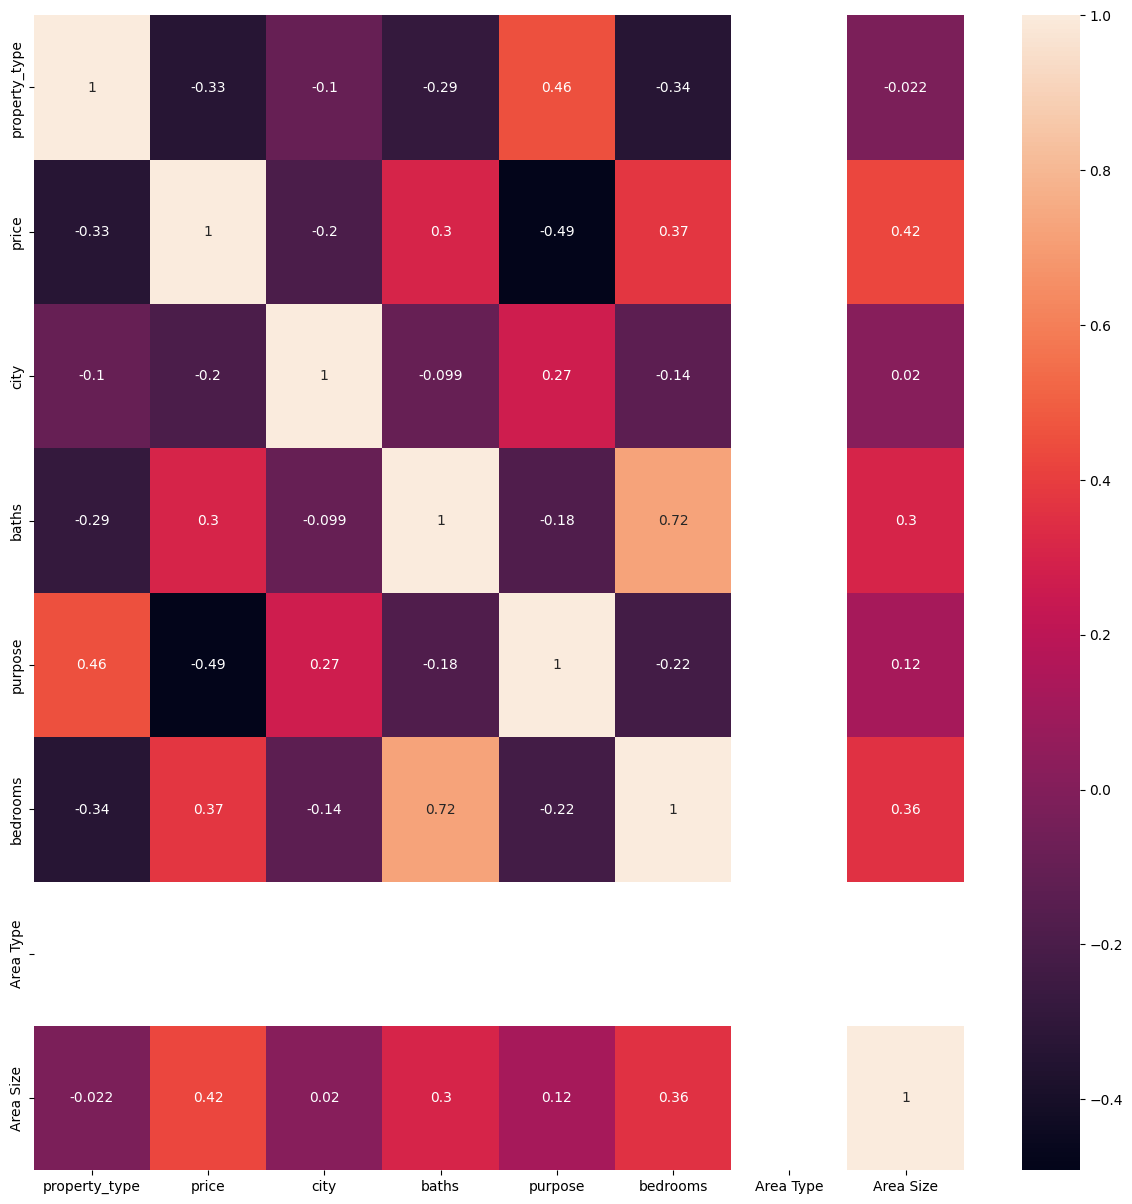

In [ ]:
#Check Corr
plt.figure(figsize=(15,15))
sns.heatmap(model3.corr(), annot=True)

In [ ]:
# Calculate intercept and coef
x = model3[['property_type', 'city', 'baths', 'purpose', 'bedrooms',
       'Area Type', 'Area Size']]
y = model3['price']

model3_predict = linear_model.LinearRegression()
model3_predict.fit(x,y)

print('intercept =', model3_predict.intercept_)
print('coef = ', model3_predict.coef_)

intercept = 18837747.255396254
coef =  [-9.79124699e+05 -8.42669352e+05  3.25155327e+02 -1.40492959e+07
  4.81277277e+05  0.00000000e+00  1.82789652e+06]


In [ ]:
# Perdiction
predict_DT3 = model3.copy()
predict = model3_predict.predict(x)
predict_DT3['Predict'] = predict
predict_DT3

,property_type,price,city,baths,purpose,bedrooms,Area Type,Area Size,Predict
0,1,4400000,1,2,1,2,272.25,0.0,3.929862e+06
1,1,12500000,2,5,1,5,272.25,0.0,4.532000e+06
2,1,18000000,2,3,1,3,272.25,0.0,3.568795e+06
3,1,16500000,3,4,1,5,272.25,0.0,3.689006e+06
4,1,31500000,3,0,1,0,272.25,0.0,1.281319e+06
...,...,...,...,...,...,...,...,...,...
168436,3,46000,3,0,2,3,272.25,9.9,4.813781e+06
168438,1,17500000,1,5,1,7,272.25,9.9,2.443340e+07
168439,5,45000,3,3,2,3,272.25,9.9,2.856507e+06
168440,3,185000,3,3,2,3,272.25,9.9,4.814756e+06


In [ ]:
# Calculate MAE, MSE, RMSE, and R2
MAE = metrics.mean_absolute_error(predict_DT3['price'], predict_DT3['Predict'])
print(f'MAE = {MAE:.2f}')

MSE = metrics.mean_squared_error(predict_DT3['price'], predict_DT3['Predict'])
print(f'MSE = {MSE:.2f}')

RMSE = (np.sqrt(MSE))
print(f'RMSE = {RMSE:.2f}')

r2 = metrics.r2_score(predict_DT3['price'], predict_DT3['Predict'])
print(f'R2 = {r2:.3f}')

MAE = 5567256.06
MSE = 86671663736632.48
RMSE = 9309761.74
R2 = 0.498


# **Model 4**

Delete Value "Area Type" from Model 3

MAE = 5567256.06


MSE = 86671663736632.47

RMSE = 9309761.74

R2 = 0.498

## Data Preparation

### 1. Paring

In [ ]:
model4 = model3.copy()
model4.head()

,property_type,price,city,baths,purpose,bedrooms,Area Type,Area Size
0,1,4400000,1,2,1,2,272.25,0.0
1,1,12500000,2,5,1,5,272.25,0.0
2,1,18000000,2,3,1,3,272.25,0.0
3,1,16500000,3,4,1,5,272.25,0.0
4,1,31500000,3,0,1,0,272.25,0.0


In [ ]:
model4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135432 entries, 0 to 168441
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  135432 non-null  int64  
 1   price          135432 non-null  int64  
 2   city           135432 non-null  int64  
 3   baths          135432 non-null  int64  
 4   purpose        135432 non-null  int64  
 5   bedrooms       135432 non-null  int64  
 6   Area Type      135432 non-null  float64
 7   Area Size      135432 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 9.3 MB


In [ ]:
model4.describe()

,property_type,price,city,baths,purpose,bedrooms,Area Type,Area Size
count,135432.000000,1.354320e+05,135432.000000,135432.000000,135432.000000,135432.000000,135432.00,135432.000000
mean,2.032105,1.093769e+07,2.246877,2.534719,1.260374,2.824938,272.25,6.745443
std,1.317518,1.313826e+07,1.249905,1.962694,0.438840,1.637687,0.00,3.316431
min,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,272.25,0.000000
25%,1.000000,1.300000e+05,1.000000,0.000000,1.000000,2.000000,272.25,4.400000
50%,1.000000,7.800000e+06,2.000000,3.000000,1.000000,3.000000,272.25,5.600000
75%,3.000000,1.500000e+07,3.000000,4.000000,2.000000,4.000000,272.25,9.600000
max,6.000000,6.900000e+08,5.000000,10.000000,2.000000,7.000000,272.25,17.900000


### 2. Delete Value

In [ ]:
model4.drop(['Area Type'], axis=1, inplace=True)

In [ ]:
model4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135432 entries, 0 to 168441
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  135432 non-null  int64  
 1   price          135432 non-null  int64  
 2   city           135432 non-null  int64  
 3   baths          135432 non-null  int64  
 4   purpose        135432 non-null  int64  
 5   bedrooms       135432 non-null  int64  
 6   Area Size      135432 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 8.3 MB


In [ ]:
model4.describe()

,property_type,price,city,baths,purpose,bedrooms,Area Size
count,135432.000000,1.354320e+05,135432.000000,135432.000000,135432.000000,135432.000000,135432.000000
mean,2.032105,1.093769e+07,2.246877,2.534719,1.260374,2.824938,6.745443
std,1.317518,1.313826e+07,1.249905,1.962694,0.438840,1.637687,3.316431
min,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.300000e+05,1.000000,0.000000,1.000000,2.000000,4.400000
50%,1.000000,7.800000e+06,2.000000,3.000000,1.000000,3.000000,5.600000
75%,3.000000,1.500000e+07,3.000000,4.000000,2.000000,4.000000,9.600000
max,6.000000,6.900000e+08,5.000000,10.000000,2.000000,7.000000,17.900000


In [ ]:
model4.columns

Index(['property_type', 'price', 'city', 'baths', 'purpose', 'bedrooms',
       'Area Size'],
      dtype='object')

## Regression

<Axes: >

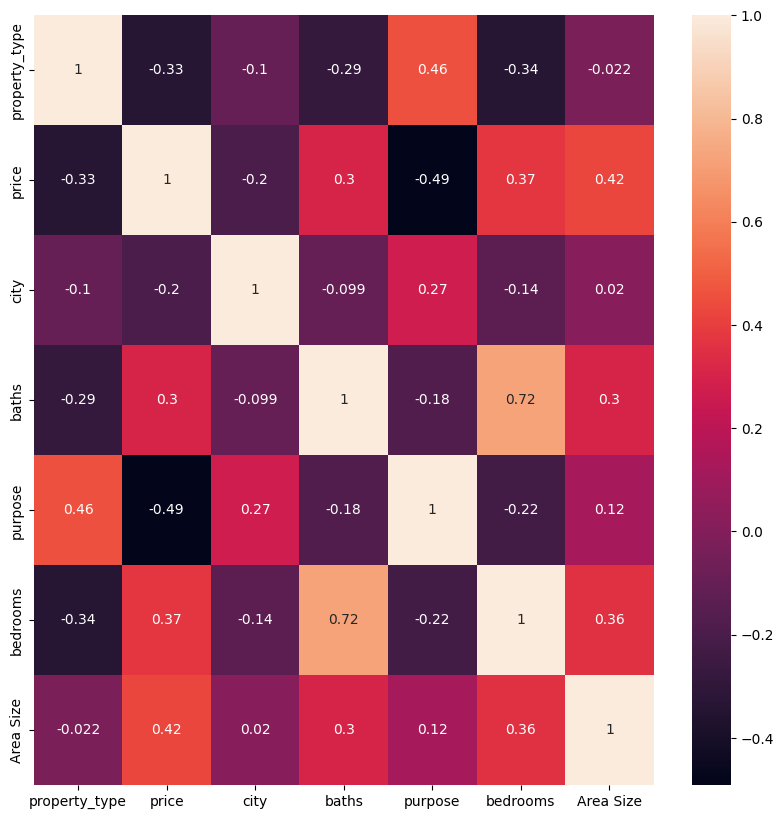

In [ ]:
#Check Corr
plt.figure(figsize=(10,10))
sns.heatmap(model4.corr(), annot=True)

In [ ]:
# Calculate intercept and coef
x = model4[['property_type', 'city', 'baths', 'purpose', 'bedrooms',
       'Area Size']]
y = model4['price']

model4_predict = linear_model.LinearRegression()
model4_predict.fit(x,y)

print('intercept =', model4_predict.intercept_)
print('coef = ', model4_predict.coef_)

intercept = 18837747.255396254
coef =  [-9.79124699e+05 -8.42669352e+05  3.25155327e+02 -1.40492959e+07
  4.81277277e+05  1.82789652e+06]


In [ ]:
# Perdiction
predict_DT04 = model4.copy()
predict = model4_predict.predict(x)
predict_DT04['Predict'] = predict
predict_DT04

,property_type,price,city,baths,purpose,bedrooms,Area Size,Predict
0,1,4400000,1,2,1,2,0.0,3.929862e+06
1,1,12500000,2,5,1,5,0.0,4.532000e+06
2,1,18000000,2,3,1,3,0.0,3.568795e+06
3,1,16500000,3,4,1,5,0.0,3.689006e+06
4,1,31500000,3,0,1,0,0.0,1.281319e+06
...,...,...,...,...,...,...,...,...
168436,3,46000,3,0,2,3,9.9,4.813781e+06
168438,1,17500000,1,5,1,7,9.9,2.443340e+07
168439,5,45000,3,3,2,3,9.9,2.856507e+06
168440,3,185000,3,3,2,3,9.9,4.814756e+06


In [ ]:
# Calculate MAE, MSE, RMSE, and R2
MAE = metrics.mean_absolute_error(predict_DT04['price'], predict_DT04['Predict'])
print(f'MAE = {MAE:.2f}')

MSE = metrics.mean_squared_error(predict_DT04['price'], predict_DT04['Predict'])
print(f'MSE = {MSE:.2f}')

RMSE = (np.sqrt(MSE))
print(f'RMSE = {RMSE:.2f}')

r2 = metrics.r2_score(predict_DT04['price'], predict_DT04['Predict'])
print(f'R2 = {r2:.3f}')

MAE = 5567256.06
MSE = 86671663736632.47
RMSE = 9309761.74
R2 = 0.498


# **Model 5**


Delete Velue "Area Type" from "Model 1"

MAE = 5553278.14

MSE = 85523964244479.66

RMSE = 9247916.75

R2 = 0.505

## Data Preparation

### 1. Paring

In [ ]:
model5 = model1.copy()
model5

,property_type,price,city,province,latitude,longitude,baths,purpose,bedrooms,Area Type,Area Size
0,1,4400000,1,1,24.893209,67.195473,2,1,2,272.25,0.0
1,1,12500000,2,2,31.474097,74.263802,5,1,5,272.25,0.0
2,1,18000000,2,2,31.462347,74.293642,3,1,3,272.25,0.0
3,1,16500000,3,3,33.648922,73.038969,4,1,5,272.25,0.0
4,1,31500000,3,3,33.692638,73.218813,0,1,0,272.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...
168436,3,46000,3,3,33.538087,73.164536,0,2,3,272.25,9.9
168438,1,17500000,1,1,24.951009,67.150744,5,1,7,272.25,9.9
168439,5,45000,3,3,33.671890,73.012254,3,2,3,272.25,9.9
168440,3,185000,3,3,33.691065,73.016382,3,2,3,272.25,9.9


In [ ]:
model5.drop(['Area Type'], axis=1, inplace=True)

In [ ]:
model5.columns

Index(['property_type', 'price', 'city', 'province', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'Area Size'],
      dtype='object')

## Regression

<Axes: >

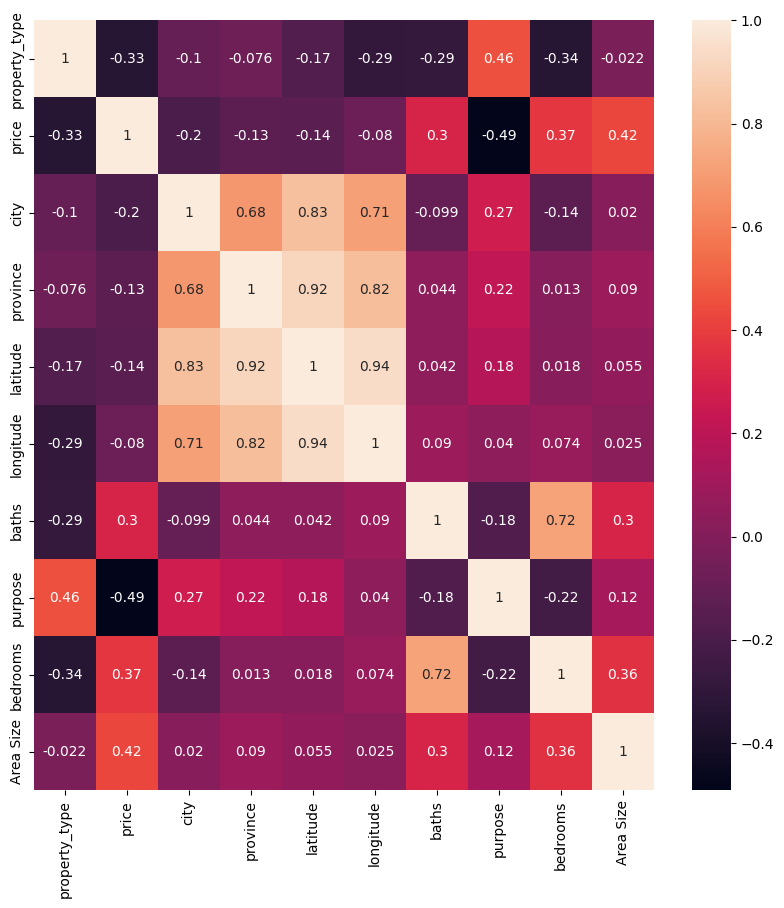

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(model5.corr(), annot=True)

In [ ]:
# Calculate intercept and coef
x = model5[['property_type', 'city', 'province', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'Area Size']]
y = model5['price']

model5_predict = linear_model.LinearRegression()
model5_predict.fit(x,y)

print('intercept =', model5_predict.intercept_)
print('coef = ', model5_predict.coef_)

intercept = 52100677.844283864
coef =  [ -1179373.68376529    342467.35174366   1776260.12657255
   -500598.19839701   -333785.39961629     43626.2170862
 -14333903.76045759    571532.93498253   1802388.5040561 ]


In [ ]:
# Perdiction
predict_DT05 = model5.copy()
predict = model5_predict.predict(x)
predict_DT05['Predict'] = predict
predict_DT05

,property_type,price,city,province,latitude,longitude,baths,purpose,bedrooms,Area Size,Predict
0,1,4400000,1,1,24.893209,67.195473,2,1,2,0.0,5.046083e+06
1,1,12500000,2,2,31.474097,74.263802,5,1,5,0.0,3.356602e+06
2,1,18000000,2,2,31.462347,74.293642,3,1,3,0.0,2.122206e+06
3,1,16500000,3,3,33.648922,73.038969,4,1,5,0.0,4.751821e+06
4,1,31500000,3,3,33.692638,73.218813,0,1,0,0.0,1.637738e+06
...,...,...,...,...,...,...,...,...,...,...,...
168436,3,46000,3,3,33.538087,73.164536,0,2,3,9.9,4.598817e+06
168438,1,17500000,1,1,24.951009,67.150744,5,1,7,9.9,2.586427e+07
168439,5,45000,3,3,33.671890,73.012254,3,2,3,9.9,2.354796e+06
168440,3,185000,3,3,33.691065,73.016382,3,2,3,9.9,4.702567e+06


In [ ]:
# Calculate MAE, MSE, RMSE, and R2
MAE = metrics.mean_absolute_error(predict_DT05['price'], predict_DT05['Predict'])
print(f'MAE = {MAE:.2f}')

MSE = metrics.mean_squared_error(predict_DT05['price'], predict_DT05['Predict'])
print(f'MSE = {MSE:.2f}')

RMSE = (np.sqrt(MSE))
print(f'RMSE = {RMSE:.2f}')

r2 = metrics.r2_score(predict_DT05['price'], predict_DT05['Predict'])
print(f'R2 = {r2:.3f}')

MAE = 5553278.14
MSE = 85523964244479.66
RMSE = 9247916.75
R2 = 0.505


# **Model 6**

Use Value just "property_type, baths, bedrooms, Area Size"

Use Data from zameen_dataC

MAE = 15351225.86

MSE = 1094889086330666.88

RMSE = 33089108.27

R2 = 0.122

## Data Preparation

In [ ]:
model6 = zameen_dataC.copy()
model6

,property_type,price,city,province,latitude,longitude,baths,purpose,bedrooms,Area Type,Area Size
0,1,4400000,1,1,24.893209,67.195473,2,1,2,272.25,0.0
1,1,12500000,2,2,31.474097,74.263802,5,1,5,272.25,0.0
2,1,18000000,2,2,31.462347,74.293642,3,1,3,272.25,0.0
3,1,16500000,3,3,33.648922,73.038969,4,1,5,272.25,0.0
4,1,31500000,3,3,33.692638,73.218813,0,1,0,272.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...
168441,1,20000000,3,3,33.713488,73.162680,7,1,5,272.25,9.9
168442,2,100000000,4,2,33.292707,72.759989,2,1,2,5445.00,90.0
168443,4,48000,3,3,33.646421,73.045263,2,2,3,5445.00,90.0
168444,1,220000000,2,2,31.478891,74.329348,9,1,5,5445.00,90.0


In [ ]:
model6.columns

Index(['property_type', 'price', 'city', 'province', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'Area Type', 'Area Size'],
      dtype='object')

In [ ]:
#Delete Columns Not Used
model6.drop(['city'], axis=1, inplace=True)
model6.drop(['province'], axis=1, inplace=True)
model6.drop(['latitude'], axis=1, inplace=True)
model6.drop(['longitude'], axis=1, inplace=True)
model6.drop(['purpose'], axis=1, inplace=True)
model6.drop(['Area Type'], axis=1, inplace=True)

#"property_type, baths, bedrooms, Area Size"

In [ ]:
model6.columns

Index(['property_type', 'price', 'baths', 'bedrooms', 'Area Size'], dtype='object')

## Regression

<Axes: >

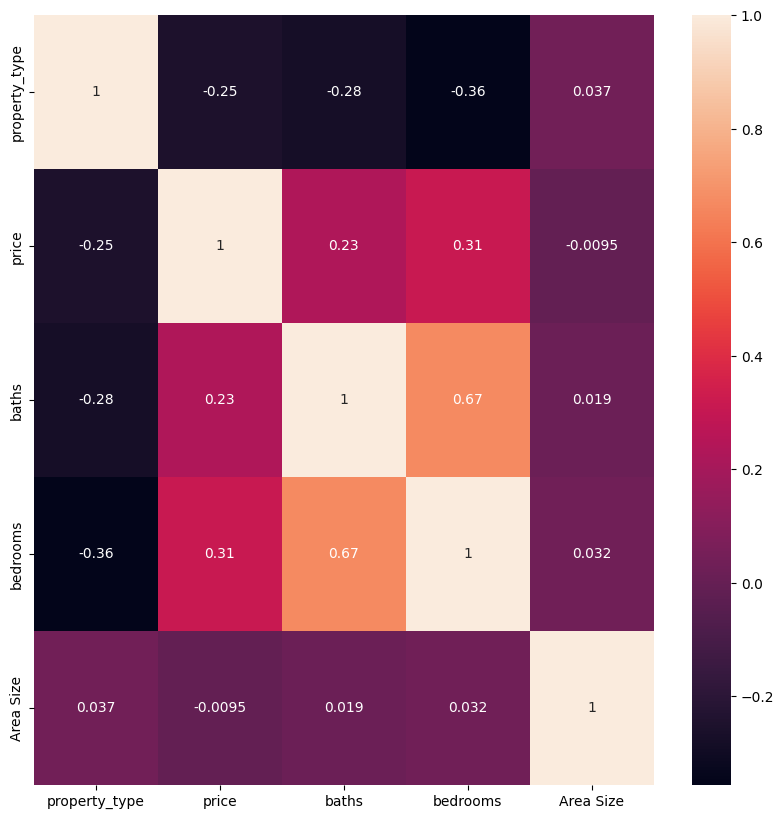

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(model6.corr(), annot=True)

In [ ]:
# Calculate intercept and coef
x = model6[['property_type', 'baths', 'bedrooms', 'Area Size']]
y = model6['price']

model6_predict = linear_model.LinearRegression()
model6_predict.fit(x,y)

print('intercept =', model6_predict.intercept_)
print('coef = ', model6_predict.coef_)

intercept = 11666400.09588245
coef =  [-4201488.61022403   343615.44471409  4327761.79368374   -72410.68258997]


In [ ]:
# Perdiction
predict_DT06 = model6.copy()
predict = model6_predict.predict(x)
predict_DT06['Predict'] = predict
predict_DT06

,property_type,price,baths,bedrooms,Area Size,Predict
0,1,4400000,2,2,0.0,1.680767e+07
1,1,12500000,5,5,0.0,3.082180e+07
2,1,18000000,3,3,0.0,2.147904e+07
3,1,16500000,4,5,0.0,3.047818e+07
4,1,31500000,0,0,0.0,7.464911e+06
...,...,...,...,...,...,...
168441,1,20000000,7,5,9.9,3.079216e+07
168442,2,100000000,2,2,90.0,6.089216e+06
168443,4,48000,2,3,90.0,2.014000e+06
168444,1,220000000,9,5,90.0,2.567930e+07


In [ ]:
# Calculate MAE, MSE, RMSE, and R2
MAE = metrics.mean_absolute_error(predict_DT06['price'], predict_DT06['Predict'])
print(f'MAE = {MAE:.2f}')

MSE = metrics.mean_squared_error(predict_DT06['price'], predict_DT06['Predict'])
print(f'MSE = {MSE:.2f}')

RMSE = (np.sqrt(MSE))
print(f'RMSE = {RMSE:.2f}')

r2 = metrics.r2_score(predict_DT06['price'], predict_DT06['Predict'])
print(f'R2 = {r2:.3f}')

MAE = 15351225.86
MSE = 1094889086330666.88
RMSE = 33089108.27
R2 = 0.122


# **Model 7**

Remove Outier from "Model 6"

MAE = 5625330.227

MSE = 58553826044939.219

RMSE = 7652047.180

R2 = 0.297

## Data Preparation

### 1. paring

In [ ]:
model7 = model6.copy()
model7.head()

,property_type,price,baths,bedrooms,Area Size
0,1,4400000,2,2,0.0
1,1,12500000,5,5,0.0
2,1,18000000,3,3,0.0
3,1,16500000,4,5,0.0
4,1,31500000,0,0,0.0


### 2. Remove Outlier

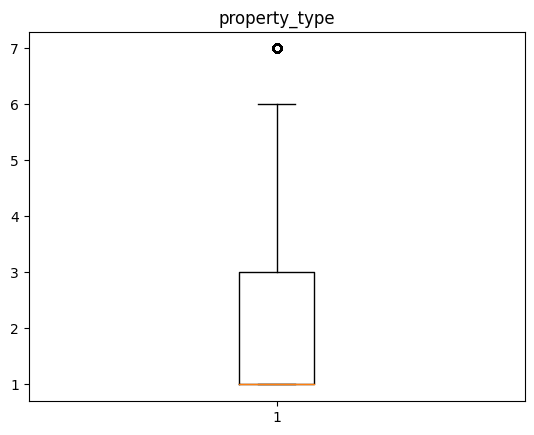

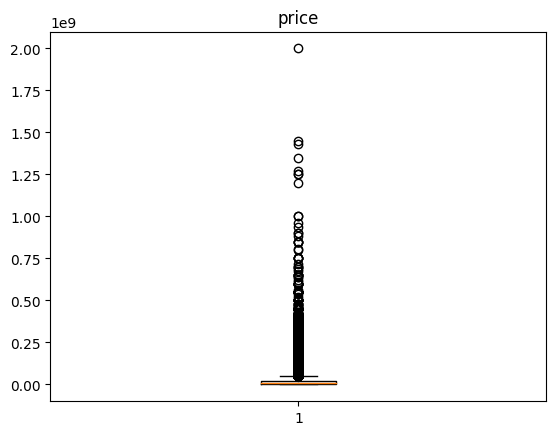

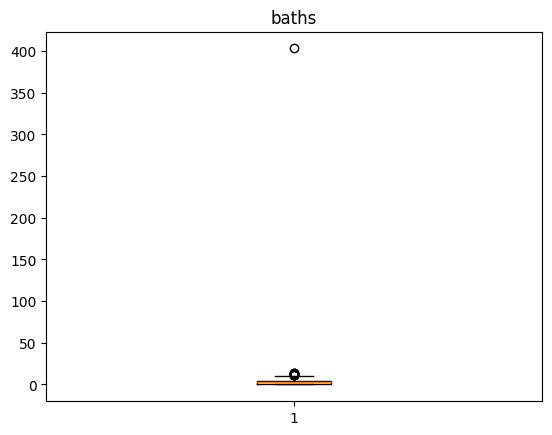

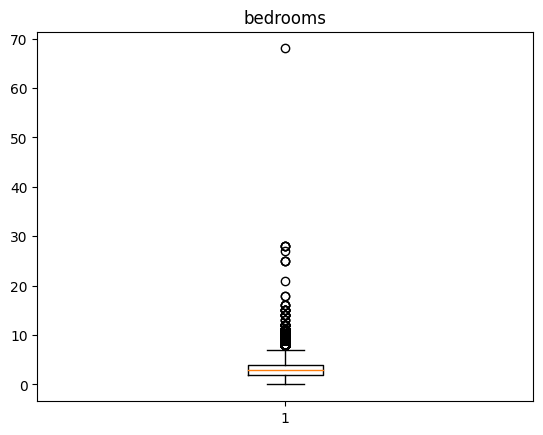

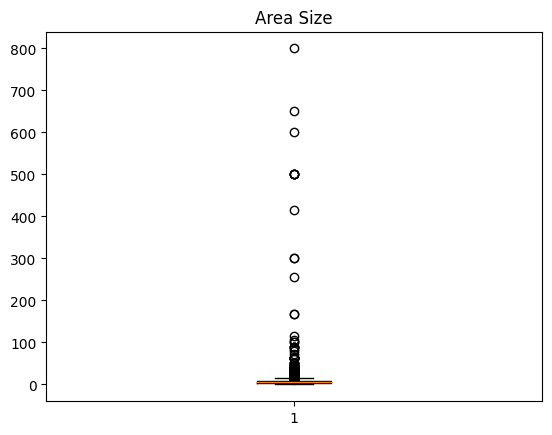

In [ ]:
#Check Outlier
for i in model7.columns :
  plt.boxplot(model7[i])
  plt.title(f'{i}')
  plt.show()
  print()

In [ ]:
model7.columns

Index(['property_type', 'price', 'baths', 'bedrooms', 'Area Size'], dtype='object')

In [ ]:
#function to remove outlier
def outlier(name) :
  Q3 = np.percentile(model1[f'{name}'],75)
  Q1 = np.percentile(model1[f'{name}'],25)
  IQR = Q3 - Q1
  Upper_bound = Q3 + ( 1.5 * IQR )
  Lower_bound = Q1 - ( 1.5 * IQR )
  return IQR,Upper_bound,Lower_bound

#Remove outlier
#property_type
IQR,Upper_bound,Lower_bound = outlier('property_type')
model7 = model7[ (model7['property_type'] <= Upper_bound) & (model7['property_type'] >= Lower_bound) ]

#baths
IQR,Upper_bound,Lower_bound = outlier('baths')
model7 = model7[ (model7['baths'] <= Upper_bound) & (model7['baths'] >= Lower_bound) ]

#bedrooms
IQR,Upper_bound,Lower_bound = outlier('bedrooms')
model7 = model7[ (model7['bedrooms'] <= Upper_bound) & (model7['bedrooms'] >= Lower_bound) ]

#Area Size
IQR,Upper_bound,Lower_bound = outlier('Area Size')
model7 = model7[ (model7['Area Size'] <= Upper_bound) & (model7['Area Size'] >= Lower_bound) ]

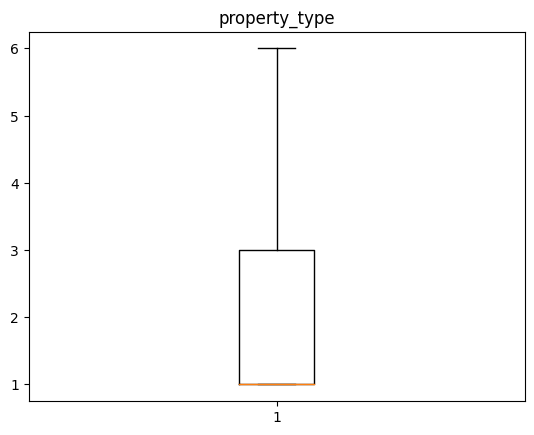

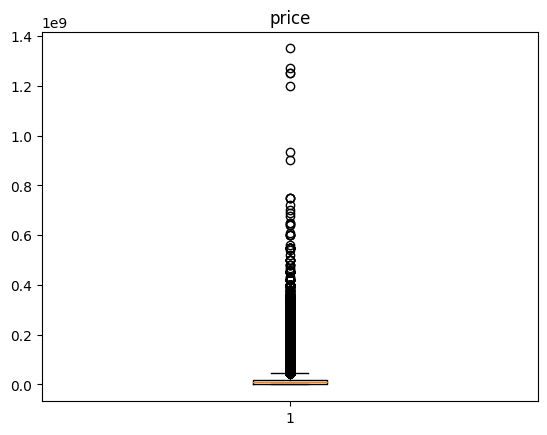

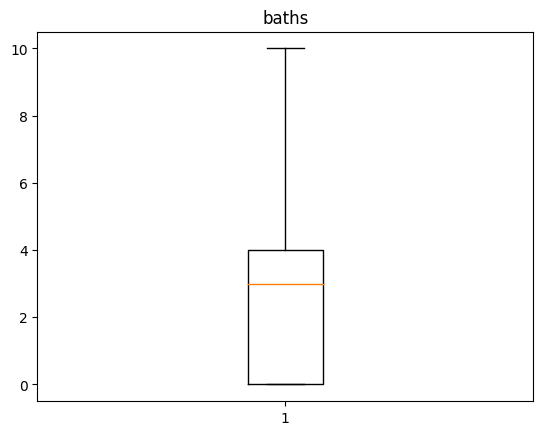

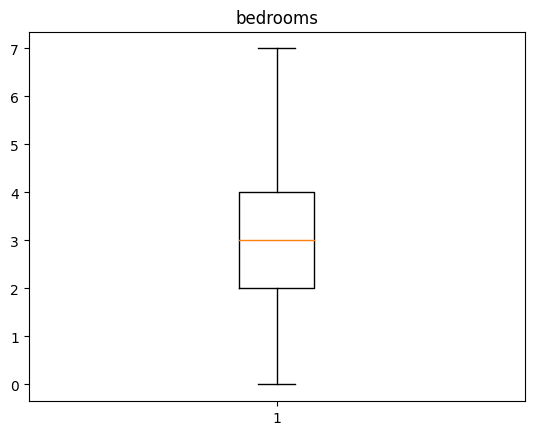

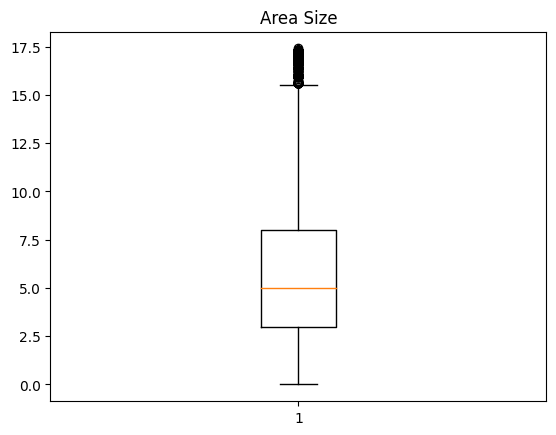

In [ ]:
# Check outlier
for i in model7.columns :
  plt.boxplot(model7[i])
  plt.title(f'{i}')
  plt.show()
  print()

### 3. Check Data

In [ ]:
model7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163986 entries, 0 to 168441
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  163986 non-null  int64  
 1   price          163986 non-null  int64  
 2   baths          163986 non-null  int64  
 3   bedrooms       163986 non-null  int64  
 4   Area Size      163986 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 7.5 MB


## Regression

<Axes: >

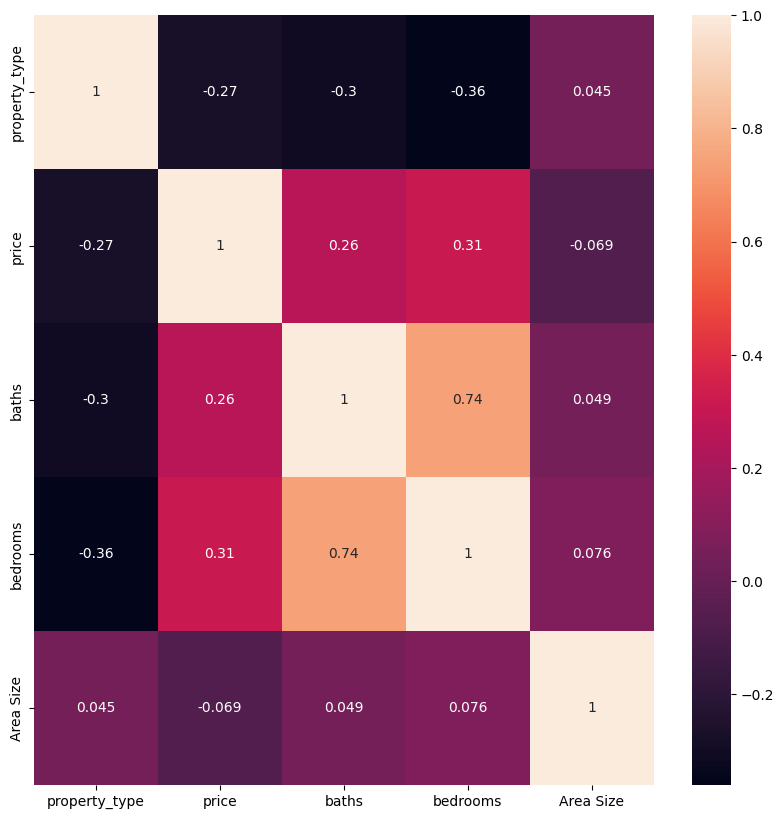

In [ ]:
# Check Corr
plt.figure(figsize=(10,10))
sns.heatmap(model7.corr(), annot=True)

In [ ]:
model7.columns

Index(['property_type', 'price', 'baths', 'bedrooms', 'Area Size'], dtype='object')

In [ ]:
# Calculate intercept and coef
x = model7[['property_type', 'baths', 'bedrooms', 'Area Size']]
y = model7['price']

model7_predict = linear_model.LinearRegression()
model7_predict.fit(x,y)

print('intercept =', model7_predict.intercept_)
print('coef = ', model7_predict.coef_)

intercept = 15307811.018410388
coef =  [-4226290.64719994   570127.7600155   4007731.1009413   -695036.26127551]


In [ ]:
# Perdiction
predict_DT07 = model7.copy()
predict = model7_predict.predict(x)
predict_DT07['Predict'] = predict
predict_DT07

,property_type,price,baths,bedrooms,Area Size,Predict
0,1,4400000,2,2,0.0,2.023724e+07
1,1,12500000,5,5,0.0,3.397081e+07
2,1,18000000,3,3,0.0,2.481510e+07
3,1,16500000,4,5,0.0,3.340069e+07
4,1,31500000,0,0,0.0,1.108152e+07
...,...,...,...,...,...,...
168436,3,46000,0,3,9.9,7.771273e+06
168438,1,17500000,5,7,9.9,3.510542e+07
168439,5,45000,3,3,9.9,1.029075e+06
168440,3,185000,3,3,9.9,9.481657e+06


In [ ]:
# Calculate MAE, MSE, RMSE, and R2
MAE = metrics.mean_absolute_error(predict_DT07['price'], predict_DT07['Predict'])
print(f'MAE = {MAE:.3f}')

MSE = metrics.mean_squared_error(predict_DT07['price'], predict_DT07['Predict'])
print(f'MSE = {MSE:.3f}')

RMSE = (np.sqrt(MSE))
print(f'RMSE = {RMSE:.3f}')

r2 = metrics.r2_score(predict_DT07['price'], predict_DT07['Predict'])
print(f'R2 = {r2:.3f}')

MAE = 14421149.638
MSE = 868634903355065.250
RMSE = 29472612.768
R2 = 0.134
